In [ ]:
!pip3 install ultralytics
!pip3 install jax
!pip3 install onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 23.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO, checks
checks()

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


описание 4 моделей

In [ ]:
from IPython.display import display, Image

In [ ]:
# Load a model
model1 = YOLO('./yolov8n-cls.pt')  # load an official model

# Predict with the model
results_cls = model1('https://ultralytics.com/images/bus.jpg', save = True)  # predict on an image

100%|██████████| 5.28M/5.28M [00:00<00:00, 69.3MB/s]


100%|██████████| 476k/476k [00:00<00:00, 13.4MB/s]


100%|██████████| 755k/755k [00:00<00:00, 18.0MB/s]

image 1/1 /content/bus.jpg: 224x224 minibus 0.43, police_van 0.29, ambulance 0.06, recreational_vehicle 0.04, bullet_train 0.03, 4.5ms
Speed: 37.5ms preprocess, 4.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict


In [ ]:
model2 = YOLO('./yolov8n-seg.pt')
results_seg = model2('https://ultralytics.com/images/bus.jpg', save = True)  # predict on an image

100%|██████████| 6.73M/6.73M [00:00<00:00, 89.9MB/s]



Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 134.3ms
Speed: 5.4ms preprocess, 134.3ms inference, 926.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict


Сконвертируем модели в ONNX и TensorRT

In [ ]:
!yolo export model='./yolov8n-cls.pt' format=engine imgsz=640 half=True device=0
!yolo export model='./yolov8n-cls.pt' format=onnx imgsz=640 device=0

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 2715880 parameters, 0 gradients, 4.3 GFLOPs

PyTorch: starting from 'yolov8n-cls.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 1000) (5.3 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: simplifying with onnxsim 0.4.35...
ONNX: export success ✅ 0.5s, saved as 'yolov8n-cls.onnx' (5.2 MB)

TensorRT: starting export with TensorRT 8.4.3.1...
[12/26/2023-09:48:42] [TRT] [I] [MemUsageChange] Init CUDA: CPU +535, GPU +0, now: CPU 1166, GPU 1211 (MiB)
[12/26/2023-09:48:44] [TRT] [I] [MemUsageChange] Init builder kernel library: CPU +274, GPU +68, now: CPU 1459, GPU 1279 (MiB)
[12/26/2023-09:48:44] [TRT] [I] ----------------------------------------------------------------
[12/26/2023-09:48:44] [TRT] [I] Input filename:   yolov8n-cls.onnx
[12/26/2023-09:48:44] [TRT] [I] ONNX IR version:  0.0.8
[12/26/2023-09:48:44] [TRT] [I] Opset versi

In [ ]:
model1_oonx = YOLO('./yolov8n-cls.onnx')
results_cls_onnx = model1_oonx('https://ultralytics.com/images/bus.jpg', save = True)

Loading yolov8n-cls.onnx for ONNX Runtime inference...

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x640 minibus 0.05, minivan 0.03, police_van 0.02, moving_van 0.02, pay-phone 0.02, 126.8ms
Speed: 10.5ms preprocess, 126.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict4


In [ ]:
model1_engine = YOLO('./yolov8n-cls.engine')
results_cls_engine = model1_engine('https://ultralytics.com/images/bus.jpg', save = True)

Loading yolov8n-cls.engine for TensorRT inference...

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x640 minibus 0.05, minivan 0.03, police_van 0.02, moving_van 0.02, pay-phone 0.02, 1.6ms
Speed: 8.1ms preprocess, 1.6ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict5


In [ ]:
!yolo export model='./yolov8n-seg.pt' format=engine imgsz=640 half=True device=0
!yolo export model='./yolov8n-seg.pt' format=onnx imgsz=640 device=0

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients, 12.6 GFLOPs

PyTorch: starting from 'yolov8n-seg.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 116, 8400), (1, 32, 160, 160)) (6.7 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: simplifying with onnxsim 0.4.35...
ONNX: export success ✅ 1.7s, saved as 'yolov8n-seg.onnx' (6.6 MB)

TensorRT: starting export with TensorRT 8.4.3.1...
[12/26/2023-09:53:06] [TRT] [I] [MemUsageChange] Init CUDA: CPU +535, GPU +0, now: CPU 1204, GPU 1353 (MiB)
[12/26/2023-09:53:07] [TRT] [I] [MemUsageChange] Init builder kernel library: CPU +274, GPU +68, now: CPU 1497, GPU 1421 (MiB)
[12/26/2023-09:53:07] [TRT] [I] ----------------------------------------------------------------
[12/26/2023-09:53:07] [TRT] [I] Input filename:   yolov8n-seg.onnx
[12/26/2023-09:53:07] [TRT] [I] ONNX IR version:  0.0.8
[12/26/2023-09:

In [ ]:
model2_oonx = YOLO('./yolov8n-seg.onnx')
results_seg_onnx = model2_oonx('https://ultralytics.com/images/bus.jpg', save = True)

Loading yolov8n-seg.onnx for ONNX Runtime inference...

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x640 4 persons, 1 bus, 1 skateboard, 377.2ms
Speed: 2.8ms preprocess, 377.2ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict3


In [ ]:
model2_engine = YOLO('./yolov8n-seg.engine')
results_seg_engine = model2_engine('https://ultralytics.com/images/bus.jpg', save = True)

Loading yolov8n-seg.engine for TensorRT inference...

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x640 4 persons, 1 bus, 1 skateboard, 3.9ms
Speed: 4.3ms preprocess, 3.9ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict4


In [ ]:
from ultralytics import YOLO

# Load a model
model2 = YOLO('./yolov8n-seg.engine')

# Predict with the model
# results = model1('https://ultralytics.com/images/bus.jpg', save = True)  # predict on an image
results = model2('https://ultralytics.com/images/bus.jpg', save = True)  # predict on an image


Loading yolov8n-seg.engine for TensorRT inference...

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x640 4 persons, 1 bus, 1 skateboard, 8.1ms
Speed: 4.7ms preprocess, 8.1ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict3


In [ ]:
import torch

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
from ultralytics.utils.benchmarks import benchmark

benchmark(model='yolov8n-seg.pt', imgsz=640)

Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.4/78.2 GB disk)

Benchmarks complete for yolov8n-seg.pt on coco8-seg.yaml at imgsz=640 (548.74s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(M)  Inference time (ms/im)
0                 PyTorch       ✅        6.7               0.5262                  178.36
1             TorchScript       ✅       13.5               0.4137                  264.04
2                    ONNX       ✅       13.2               0.4137                  228.74
3                OpenVINO       ✅       13.3               0.4137                  133.71
4                TensorRT       ❌        0.0                  NaN                     NaN
5                  CoreML       ❎        6.7                  NaN                     NaN
6   TensorFlow SavedModel       ❌        0.0                  NaN                     NaN
7     TensorFlow GraphDef       ❌        0.0                  NaN                     NaN
8         TensorFlow Lite       ❌        0.0       

,Format,Status❔,Size (MB),metrics/mAP50-95(M),Inference time (ms/im)
0,PyTorch,✅,6.7,0.5262,178.36
1,TorchScript,✅,13.5,0.4137,264.04
2,ONNX,✅,13.2,0.4137,228.74
3,OpenVINO,✅,13.3,0.4137,133.71
4,TensorRT,❌,0.0,NaN,NaN
5,CoreML,❎,6.7,NaN,NaN
6,TensorFlow SavedModel,❌,0.0,NaN,NaN
7,TensorFlow GraphDef,❌,0.0,NaN,NaN
8,TensorFlow Lite,❌,0.0,NaN,NaN
9,TensorFlow Edge TPU,❌,0.0,NaN,NaN


In [ ]:

benchmark(model='yolov8n.pt', imgsz=640, device=0)

Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.9/78.2 GB disk)

Benchmarks complete for yolov8n.pt on coco8.yaml at imgsz=640 (210.63s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅        6.2               0.6381                   49.25
1             TorchScript       ✅       12.5               0.6092                    7.91
2                    ONNX       ✅       12.2               0.6092                  173.68
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ✅       17.1               0.6092                    7.45
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ❌        0.0                  NaN                     NaN
7     TensorFlow GraphDef       ❌        0.0                  NaN                     NaN
8         TensorFlow Lite       ❌        0.0               

,Format,Status❔,Size (MB),metrics/mAP50-95(B),Inference time (ms/im)
0,PyTorch,✅,6.2,0.6381,49.25
1,TorchScript,✅,12.5,0.6092,7.91
2,ONNX,✅,12.2,0.6092,173.68
3,OpenVINO,❌,0.0,NaN,NaN
4,TensorRT,✅,17.1,0.6092,7.45
5,CoreML,❌,0.0,NaN,NaN
6,TensorFlow SavedModel,❌,0.0,NaN,NaN
7,TensorFlow GraphDef,❌,0.0,NaN,NaN
8,TensorFlow Lite,❌,0.0,NaN,NaN
9,TensorFlow Edge TPU,❌,0.0,NaN,NaN


In [ ]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 35.6/107.7 GB disk)


In [ ]:
# Run inference on an image with YOLOv8n
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

100% 6.23M/6.23M [00:00<00:00, 74.2MB/s]
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 165k/165k [00:00<00:00, 5.36MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 191.5ms
Speed: 12.5ms preprocess, 191.5ms inference, 1302.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
# Download COCO val
import torch
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d datasets && rm tmp.zip  # unzip

100%|██████████| 780M/780M [00:03<00:00, 209MB/s]


In [ ]:
# Validate YOLOv8n on COCO8 val
!yolo val model=yolov8n.pt data=coco8.yaml

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

Dataset 'coco8.yaml' images not found ⚠️, missing path '/content/datasets/coco8/images/val'
100% 433k/433k [00:00<00:00, 10.6MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100% 25/25 [00:00<00:00, 3611.92file/s]
Dataset download success ✅ (1.1s), saved to /content/datasets

100% 755k/755k [00:00<00:00, 17.7MB/s]
val: Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<00:00, 270.07it/s]
val: New cache created: /content/datasets/coco8/labels/val.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.77s/it]
                   all          4         17      0.621      0.833      0.888       0.63
                person          4         10      0.721        0.5      0.519      0.26

In [ ]:
#@title Select YOLOv8 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.8/586.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.7/514.7 kB 42.8 MB/s eta 0:00:00
Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /root/.comet.config (set COMET_CONFIG to change where it is saved).


KEY: XuIGVR1N2gHYGmS2ejv3rtYok

In [ ]:
# Train YOLOv8n on COCO8 for 3 epochs
!yolo train model=yolov8n.pt data=coco8.yaml epochs=3 imgsz=640

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco8.yaml, epochs=3, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=

# 4. Export

Export a YOLOv8 model to any supported format below with the `format` argument, i.e. `format=onnx`. See [YOLOv8 Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- 💡 ProTip: Export to [ONNX](https://onnx.ai/) or [OpenVINO](https://docs.openvino.ai/latest/index.html) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://developer.nvidia.com/tensorrt) for up to 5x GPU speedup.


| Format                                                             | `format` Argument | Model                     | Metadata | Arguments                                           |
|--------------------------------------------------------------------|-------------------|---------------------------|----------|-----------------------------------------------------|
| [PyTorch](https://pytorch.org/)                                    | -                 | `yolov8n.pt`              | ✅        | -                                                   |
| [TorchScript](https://pytorch.org/docs/stable/jit.html)            | `torchscript`     | `yolov8n.torchscript`     | ✅        | `imgsz`, `optimize`                                 |
| [ONNX](https://onnx.ai/)                                           | `onnx`            | `yolov8n.onnx`            | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `opset`     |
| [OpenVINO](https://docs.openvino.ai/latest/index.html)             | `openvino`        | `yolov8n_openvino_model/` | ✅        | `imgsz`, `half`, `int8`                             |
| [TensorRT](https://developer.nvidia.com/tensorrt)                  | `engine`          | `yolov8n.engine`          | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `workspace` |
| [CoreML](https://github.com/apple/coremltools)                     | `coreml`          | `yolov8n.mlpackage`       | ✅        | `imgsz`, `half`, `int8`, `nms`                      |
| [TF SavedModel](https://www.tensorflow.org/guide/saved_model)      | `saved_model`     | `yolov8n_saved_model/`    | ✅        | `imgsz`, `keras`, `int8`                            |
| [TF GraphDef](https://www.tensorflow.org/api_docs/python/tf/Graph) | `pb`              | `yolov8n.pb`              | ❌        | `imgsz`                                             |
| [TF Lite](https://www.tensorflow.org/lite)                         | `tflite`          | `yolov8n.tflite`          | ✅        | `imgsz`, `half`, `int8`                             |
| [TF Edge TPU](https://coral.ai/docs/edgetpu/models-intro/)         | `edgetpu`         | `yolov8n_edgetpu.tflite`  | ✅        | `imgsz`                                             |
| [TF.js](https://www.tensorflow.org/js)                             | `tfjs`            | `yolov8n_web_model/`      | ✅        | `imgsz`                                             |
| [PaddlePaddle](https://github.com/PaddlePaddle)                    | `paddle`          | `yolov8n_paddle_model/`   | ✅        | `imgsz`                                             |
| [ncnn](https://github.com/Tencent/ncnn)                            | `ncnn`            | `yolov8n_ncnn_model/`     | ✅        | `imgsz`, `half`                                     |


In [ ]:
!yolo export model=yolov8n.pt format=torchscript
!yolo export model=yolov8n.pt format=onnx
!yolo export model=yolov8n.pt format=tensorrt

100% 6.23M/6.23M [00:00<00:00, 86.6MB/s]
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.30GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

TorchScript: starting export with torch 2.1.0+cu121...
TorchScript: export success ✅ 5.9s, saved as 'yolov8n.torchscript' (12.4 MB)

Export complete (9.2s)
Results saved to /content
Predict:         yolo predict task=detect model=yolov8n.torchscript imgsz=640  
Validate:        yolo val task=detect model=yolov8n.torchscript imgsz=640 data=coco.yaml  
Visualize:       https://netron.app
💡 Learn more at https://docs.ultralytics.com/modes/export
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.30GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3,

In [ ]:
# import shutil

# shutil.rmtree('./runs/detect/val3')

In [ ]:
!yolo val model=yolov8n.pt data=coco8.yaml

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
val: Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:02<00:00,  2.24s/it]
                   all          4         17      0.621      0.833      0.888       0.63
                person          4         10      0.721        0.5      0.519      0.269
                   dog          4          1       0.37          1      0.995      0.597
                 horse          4          2      0.751          1      0.995      0.631
              elephant          4          2      0.505        0.5      0.828      0.394
              umbrella          4          1      0.564          1      0.995      0.995
          potted plant          4          1      0.814 

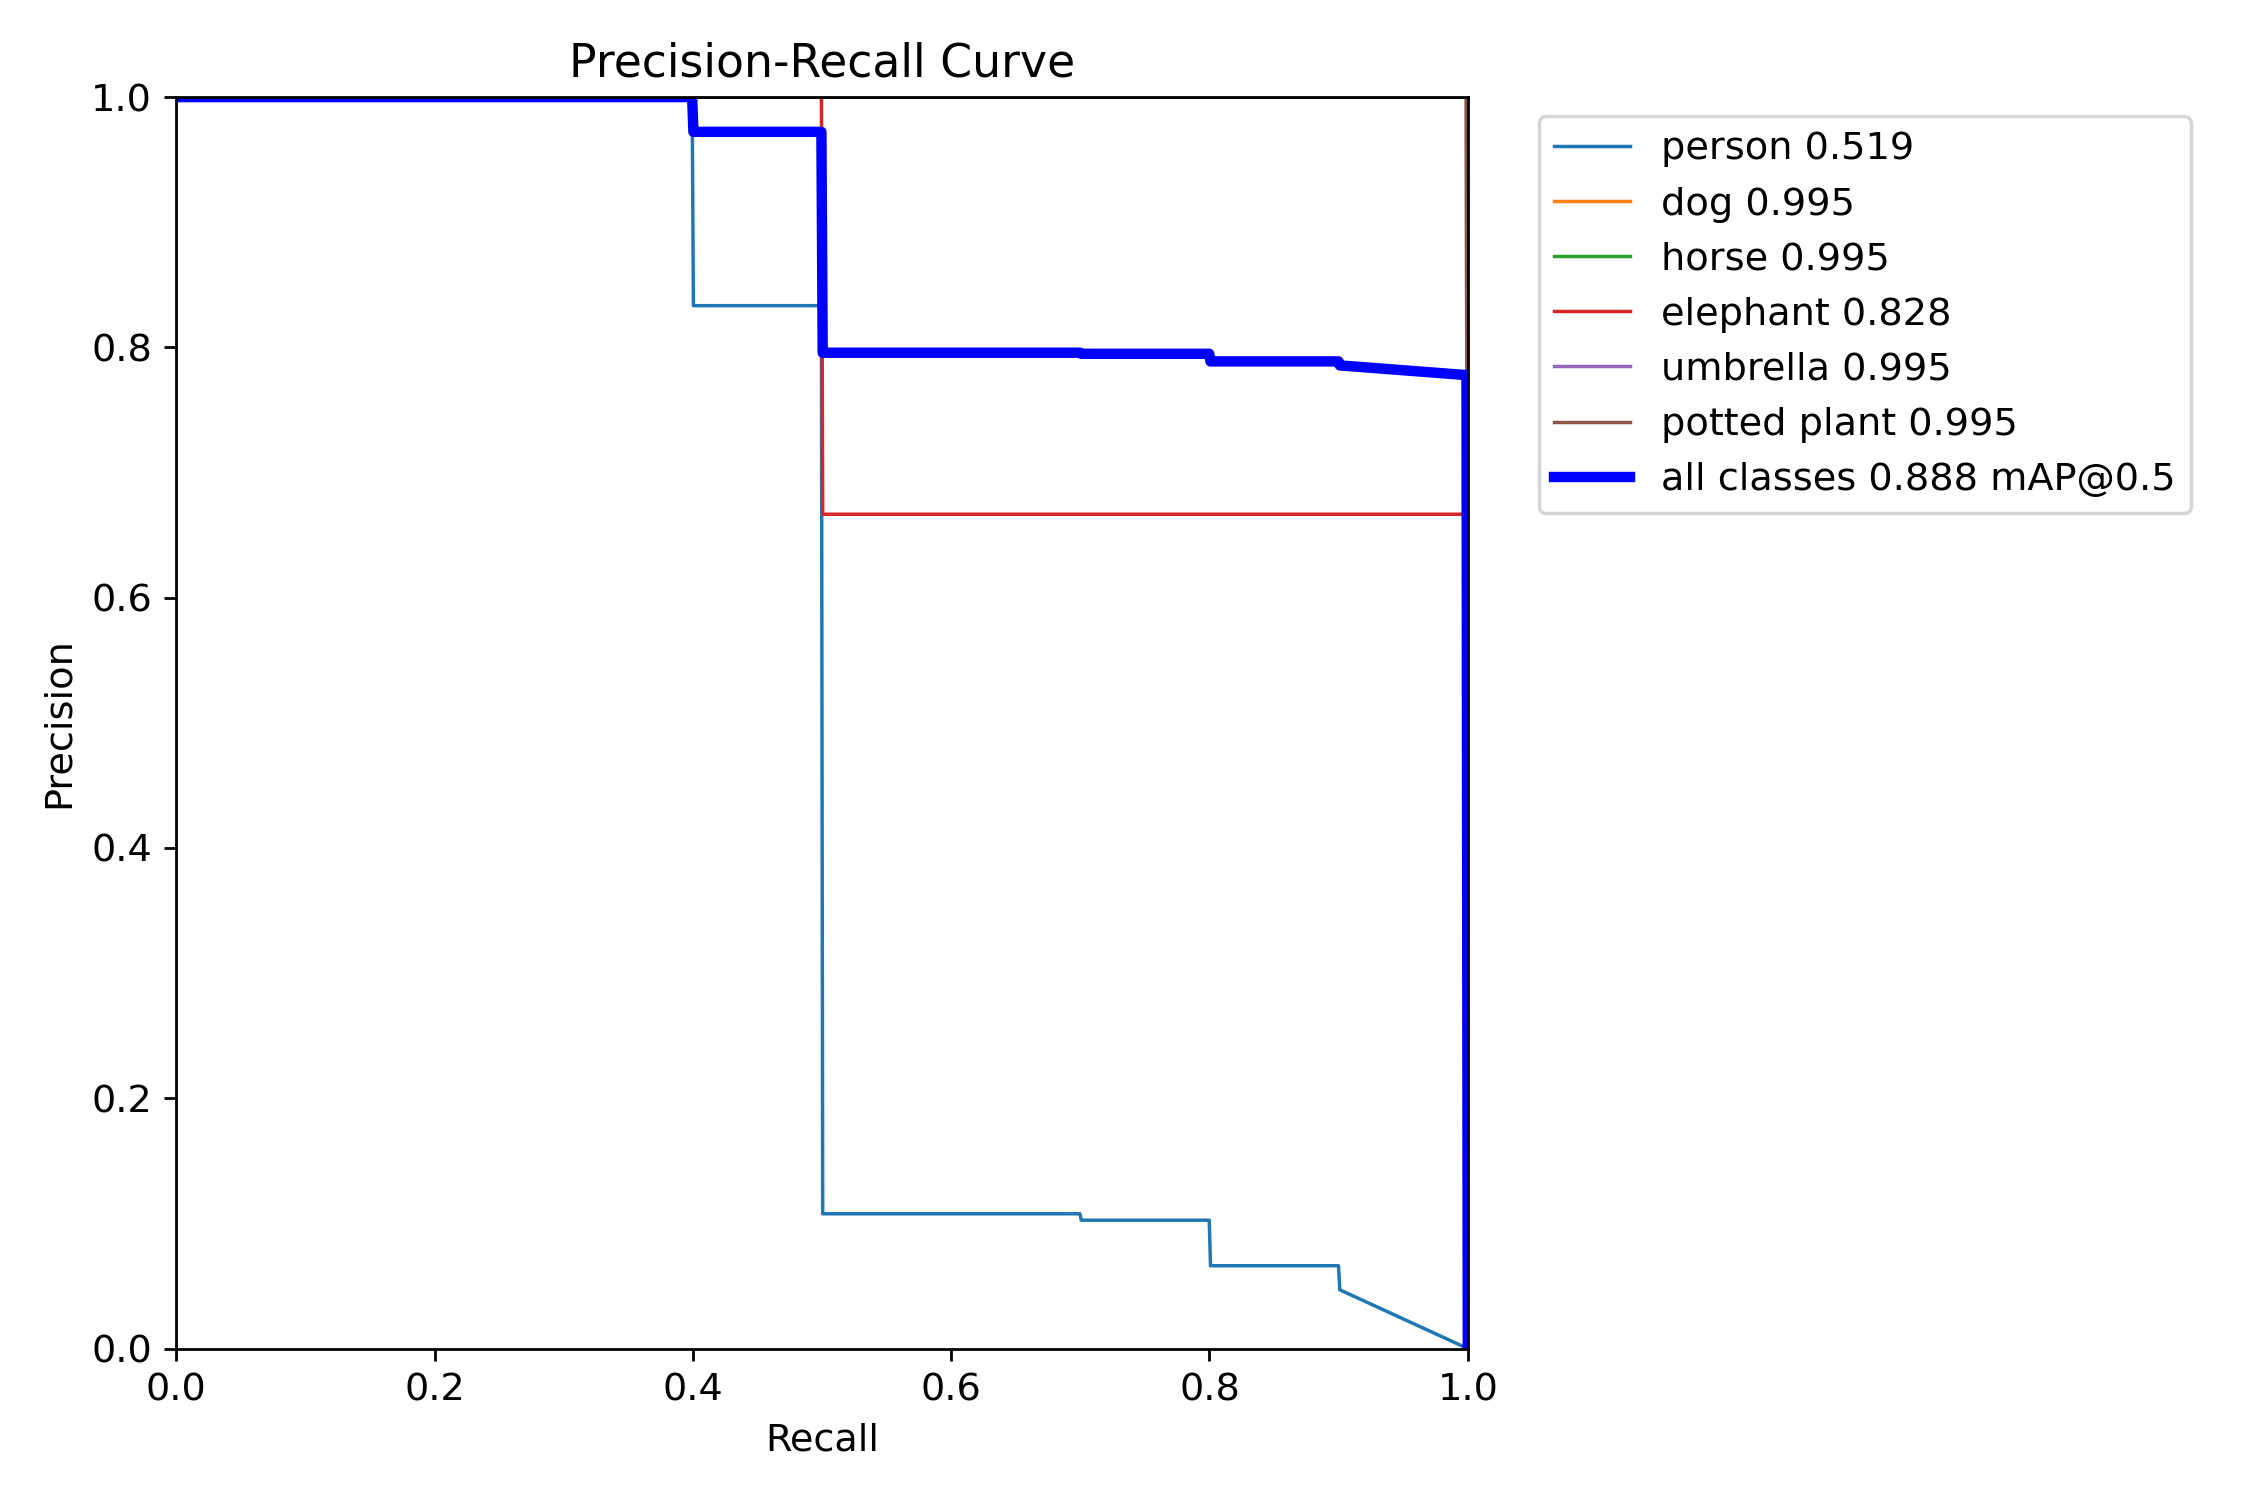

In [ ]:
Image(filename='runs/detect/val/PR_curve.png', width = 700)

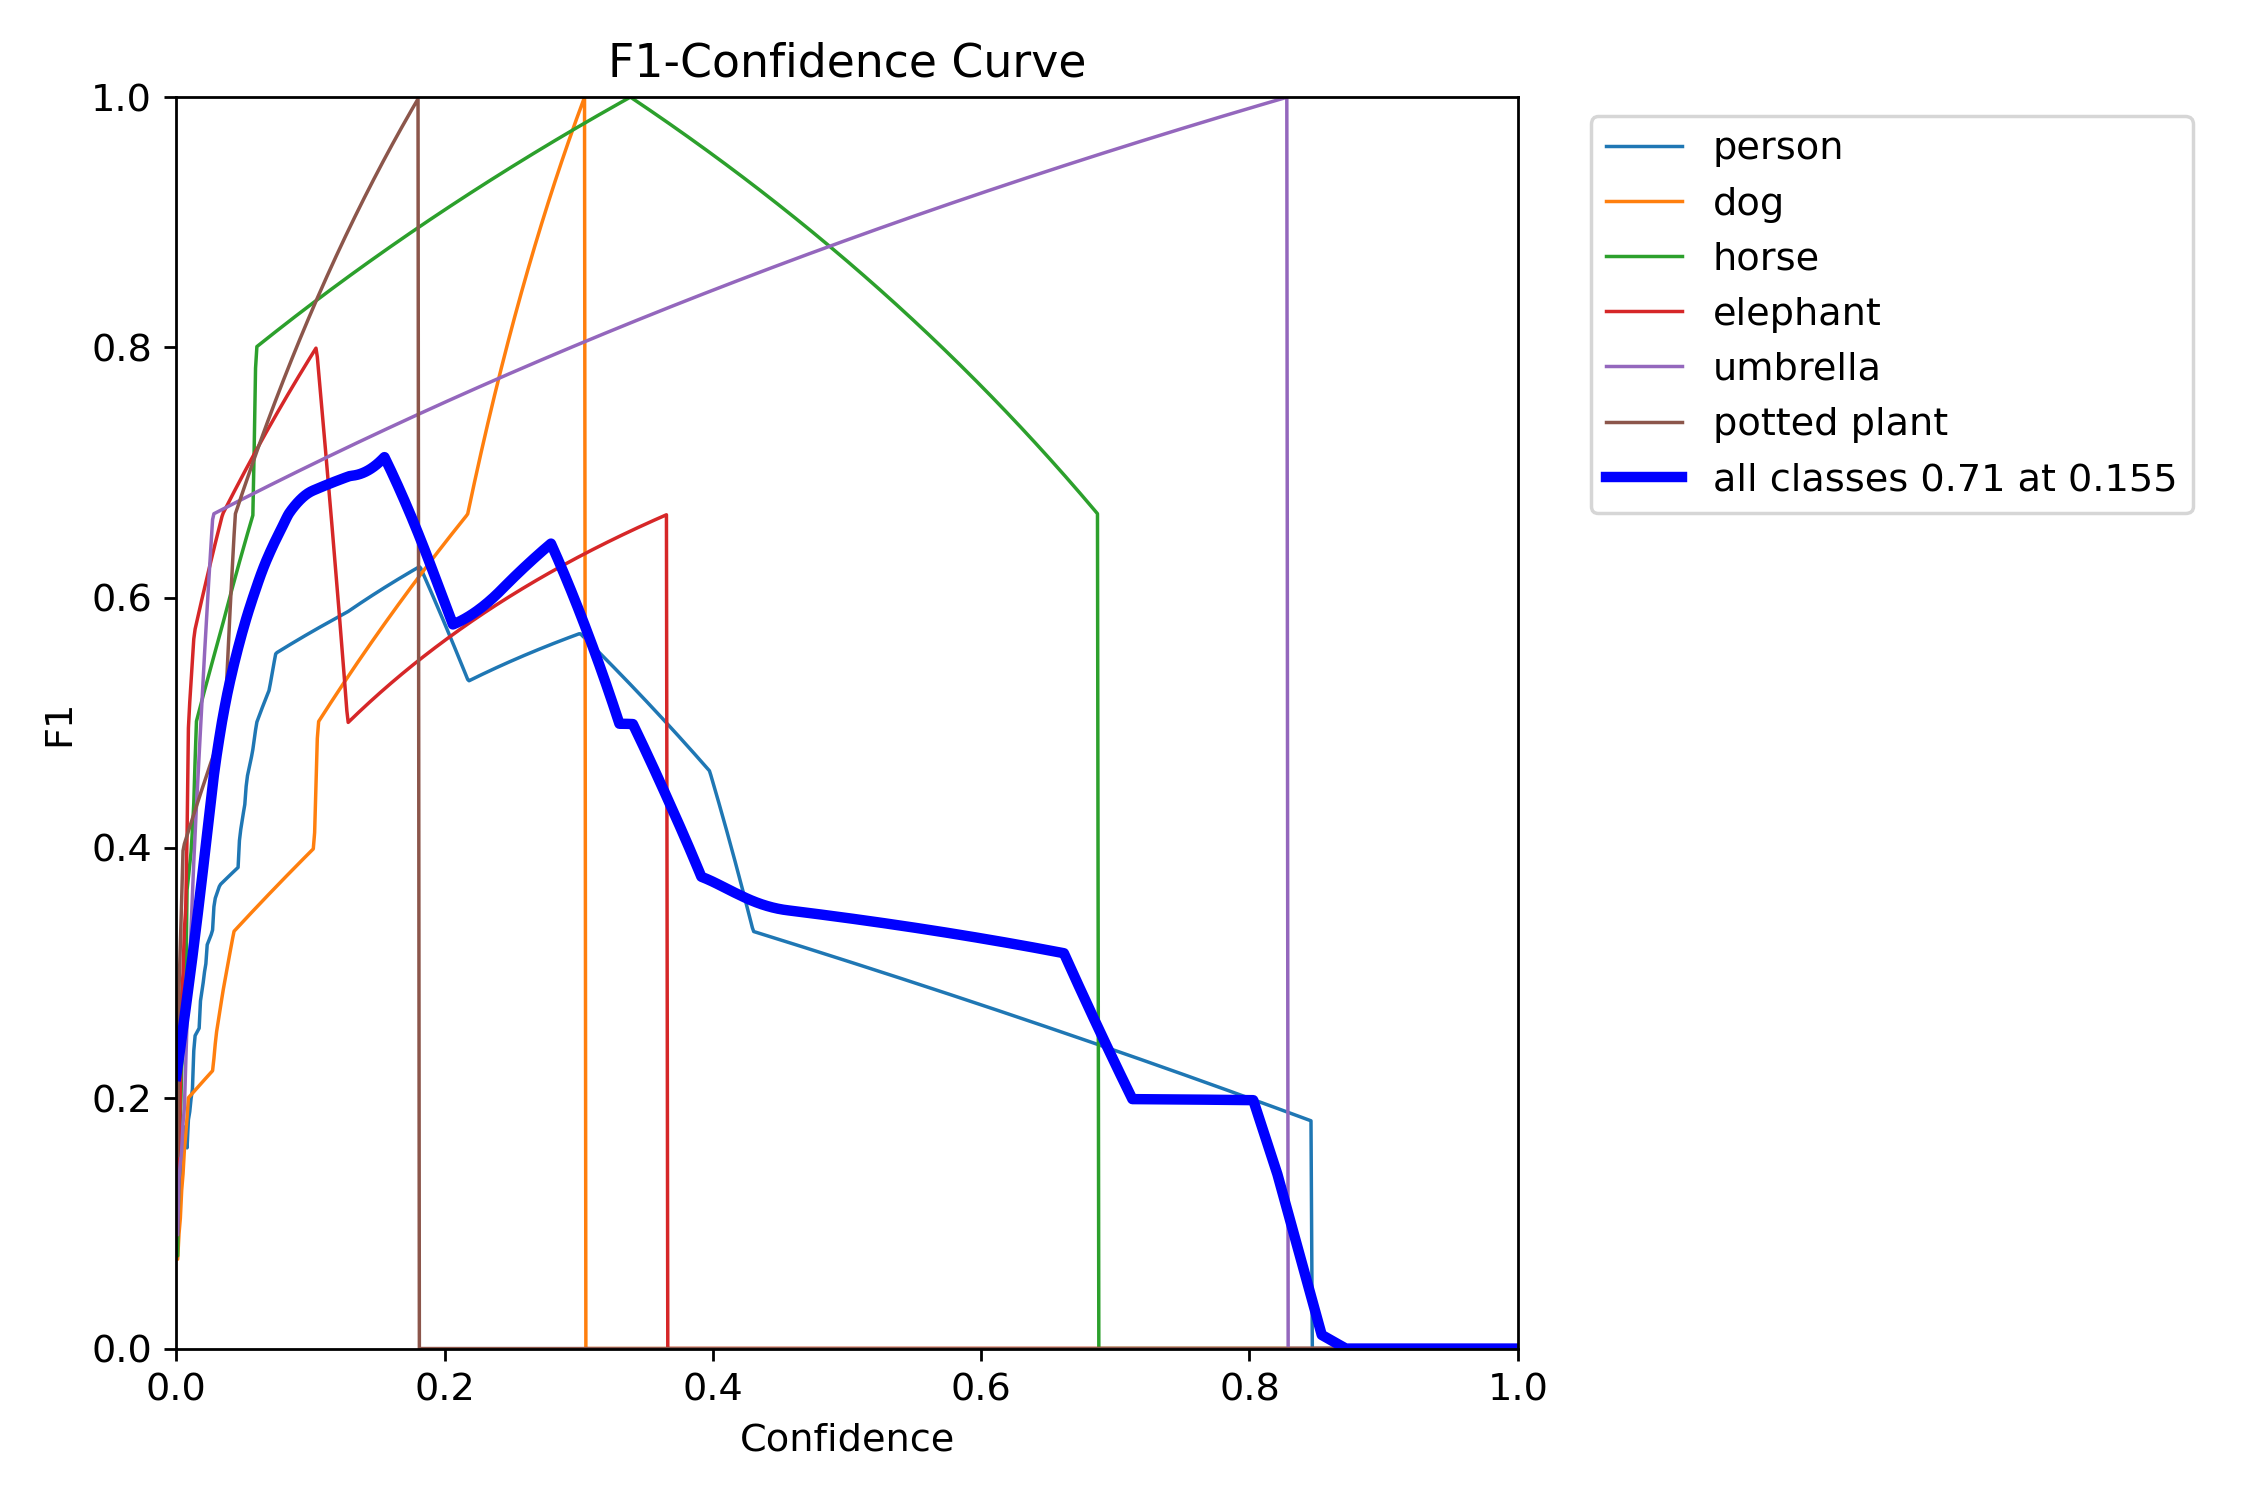

In [ ]:
Image(filename='runs/detect/val/F1_curve.png', width = 700)

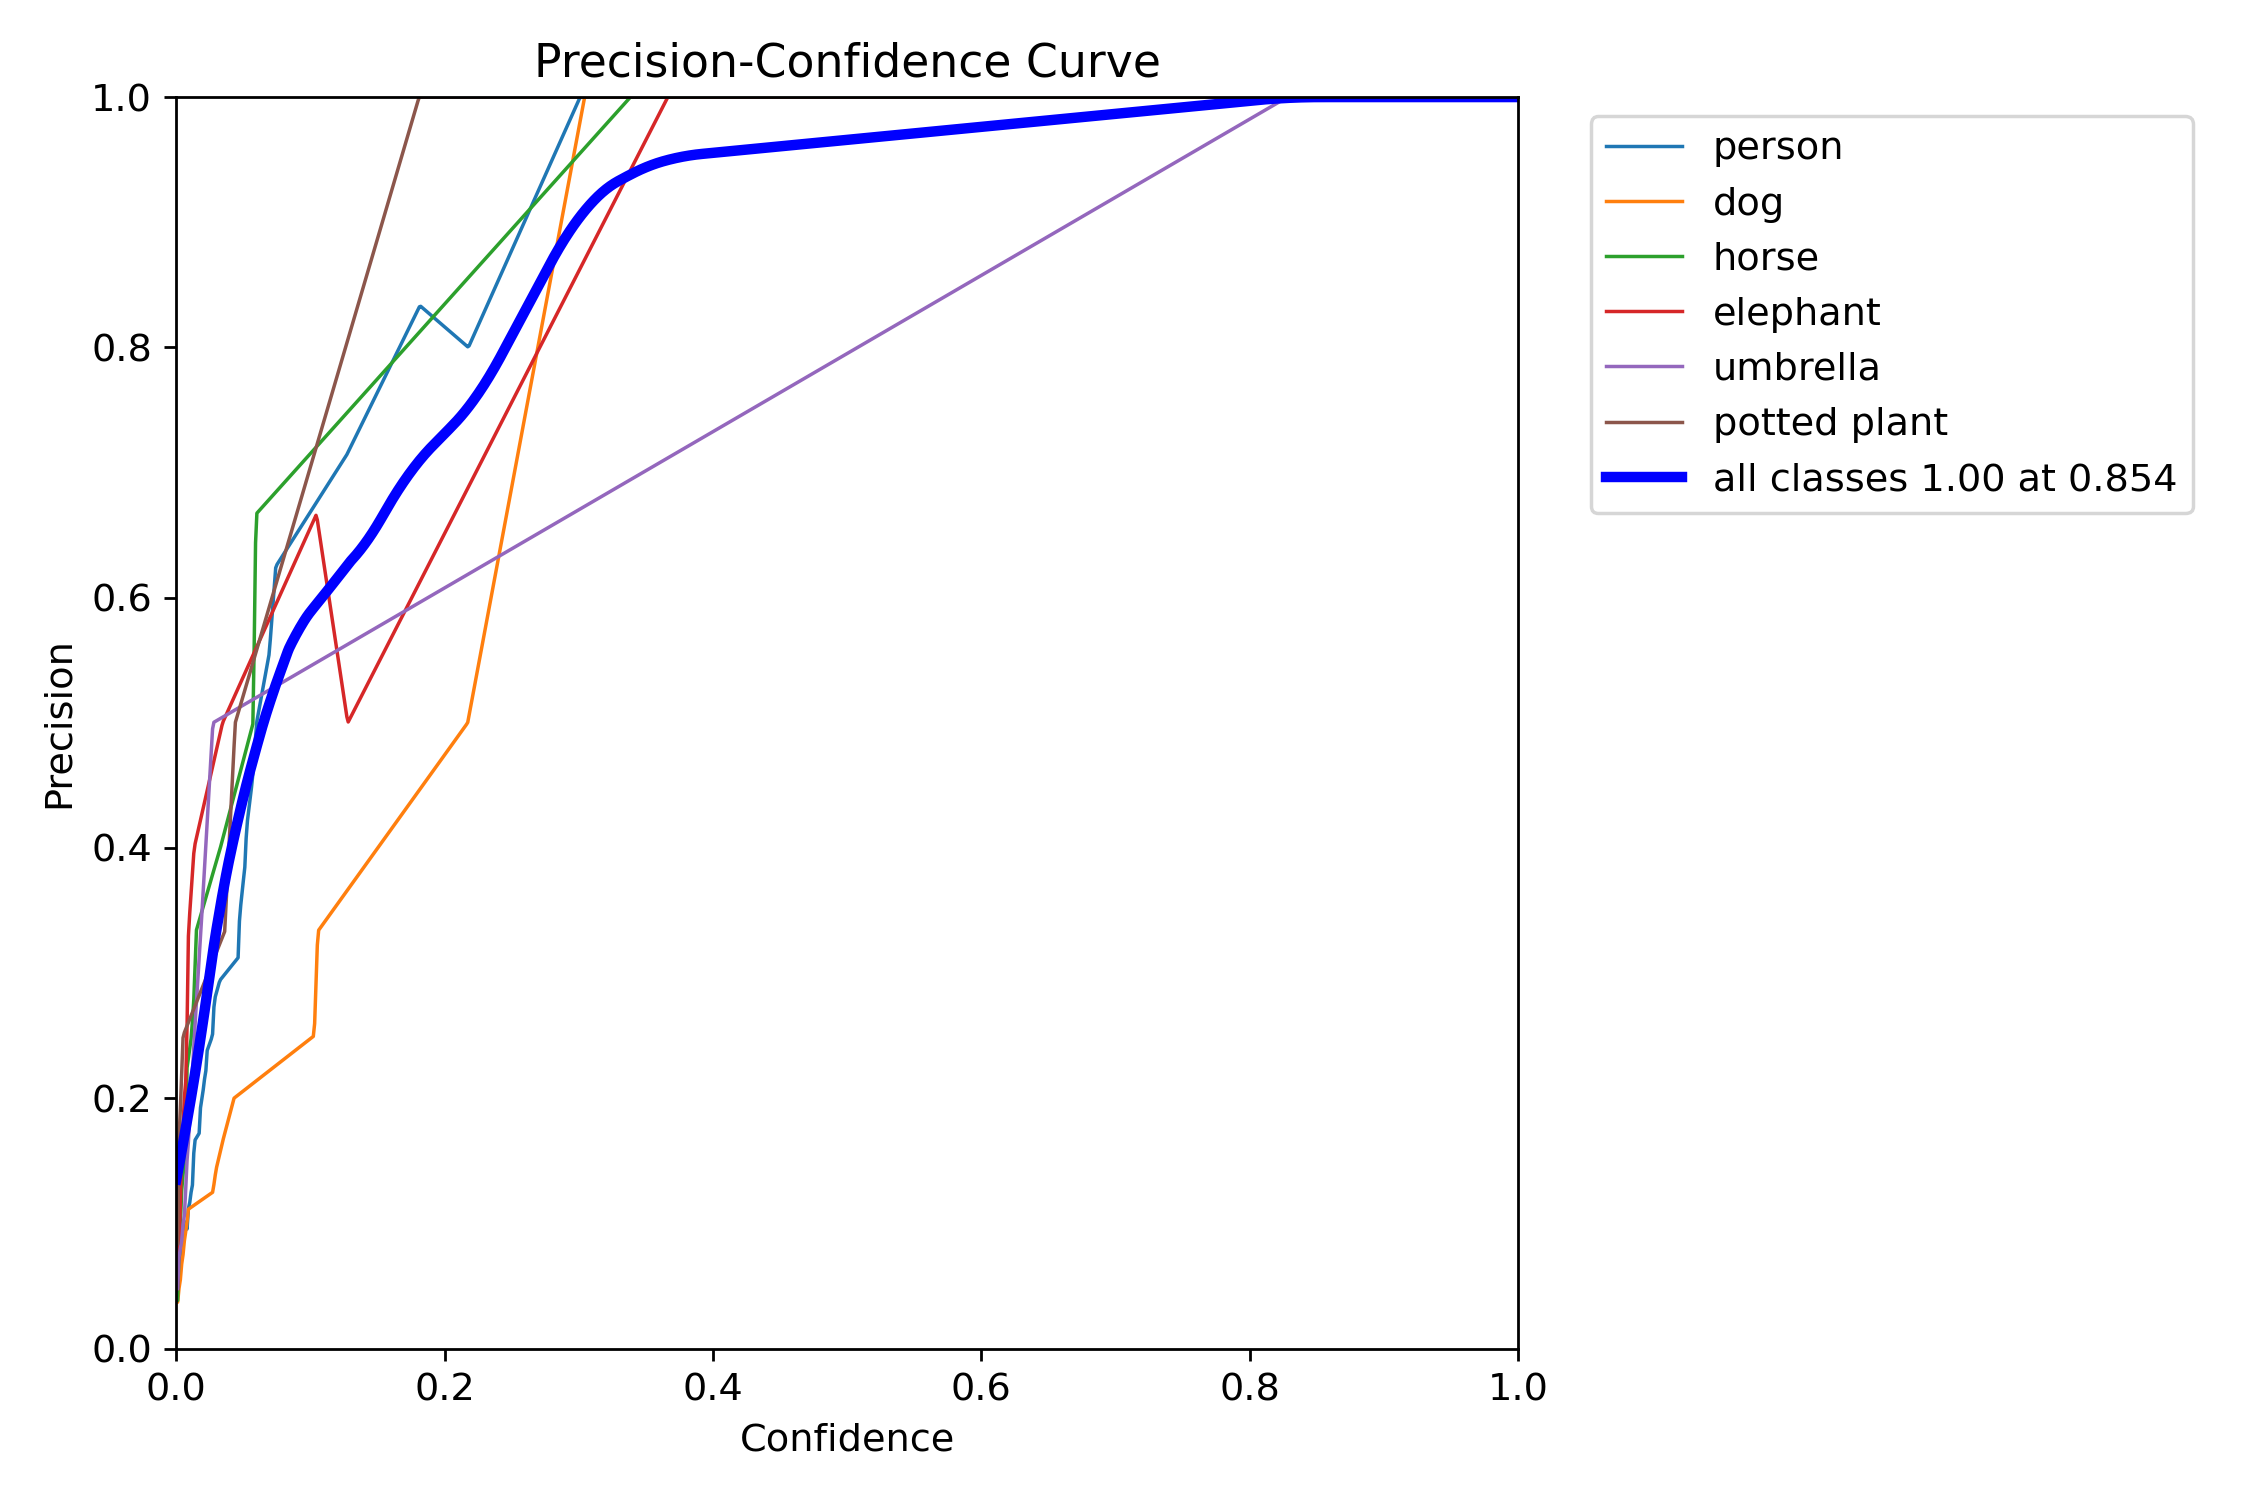

In [ ]:
Image(filename='runs/detect/val/P_curve.png', width = 700)

In [ ]:
!yolo val model=yolov8n.onnx data=coco8.yaml

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify', or 'pose'.
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Loading yolov8n.onnx for ONNX Runtime inference...
Forcing batch=1 square inference (1,3,640,640) for non-PyTorch models
val: Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:01<00:00,  3.51it/s]
                   all          4         17      0.708      0.833      0.809      0.609
                person          4         10      0.781        0.5      0.541      0.278
                   dog          4          1      0.451          1      0.497      0.348
                 horse          4          2      0.817          1      0.995      0.747
              elephant  

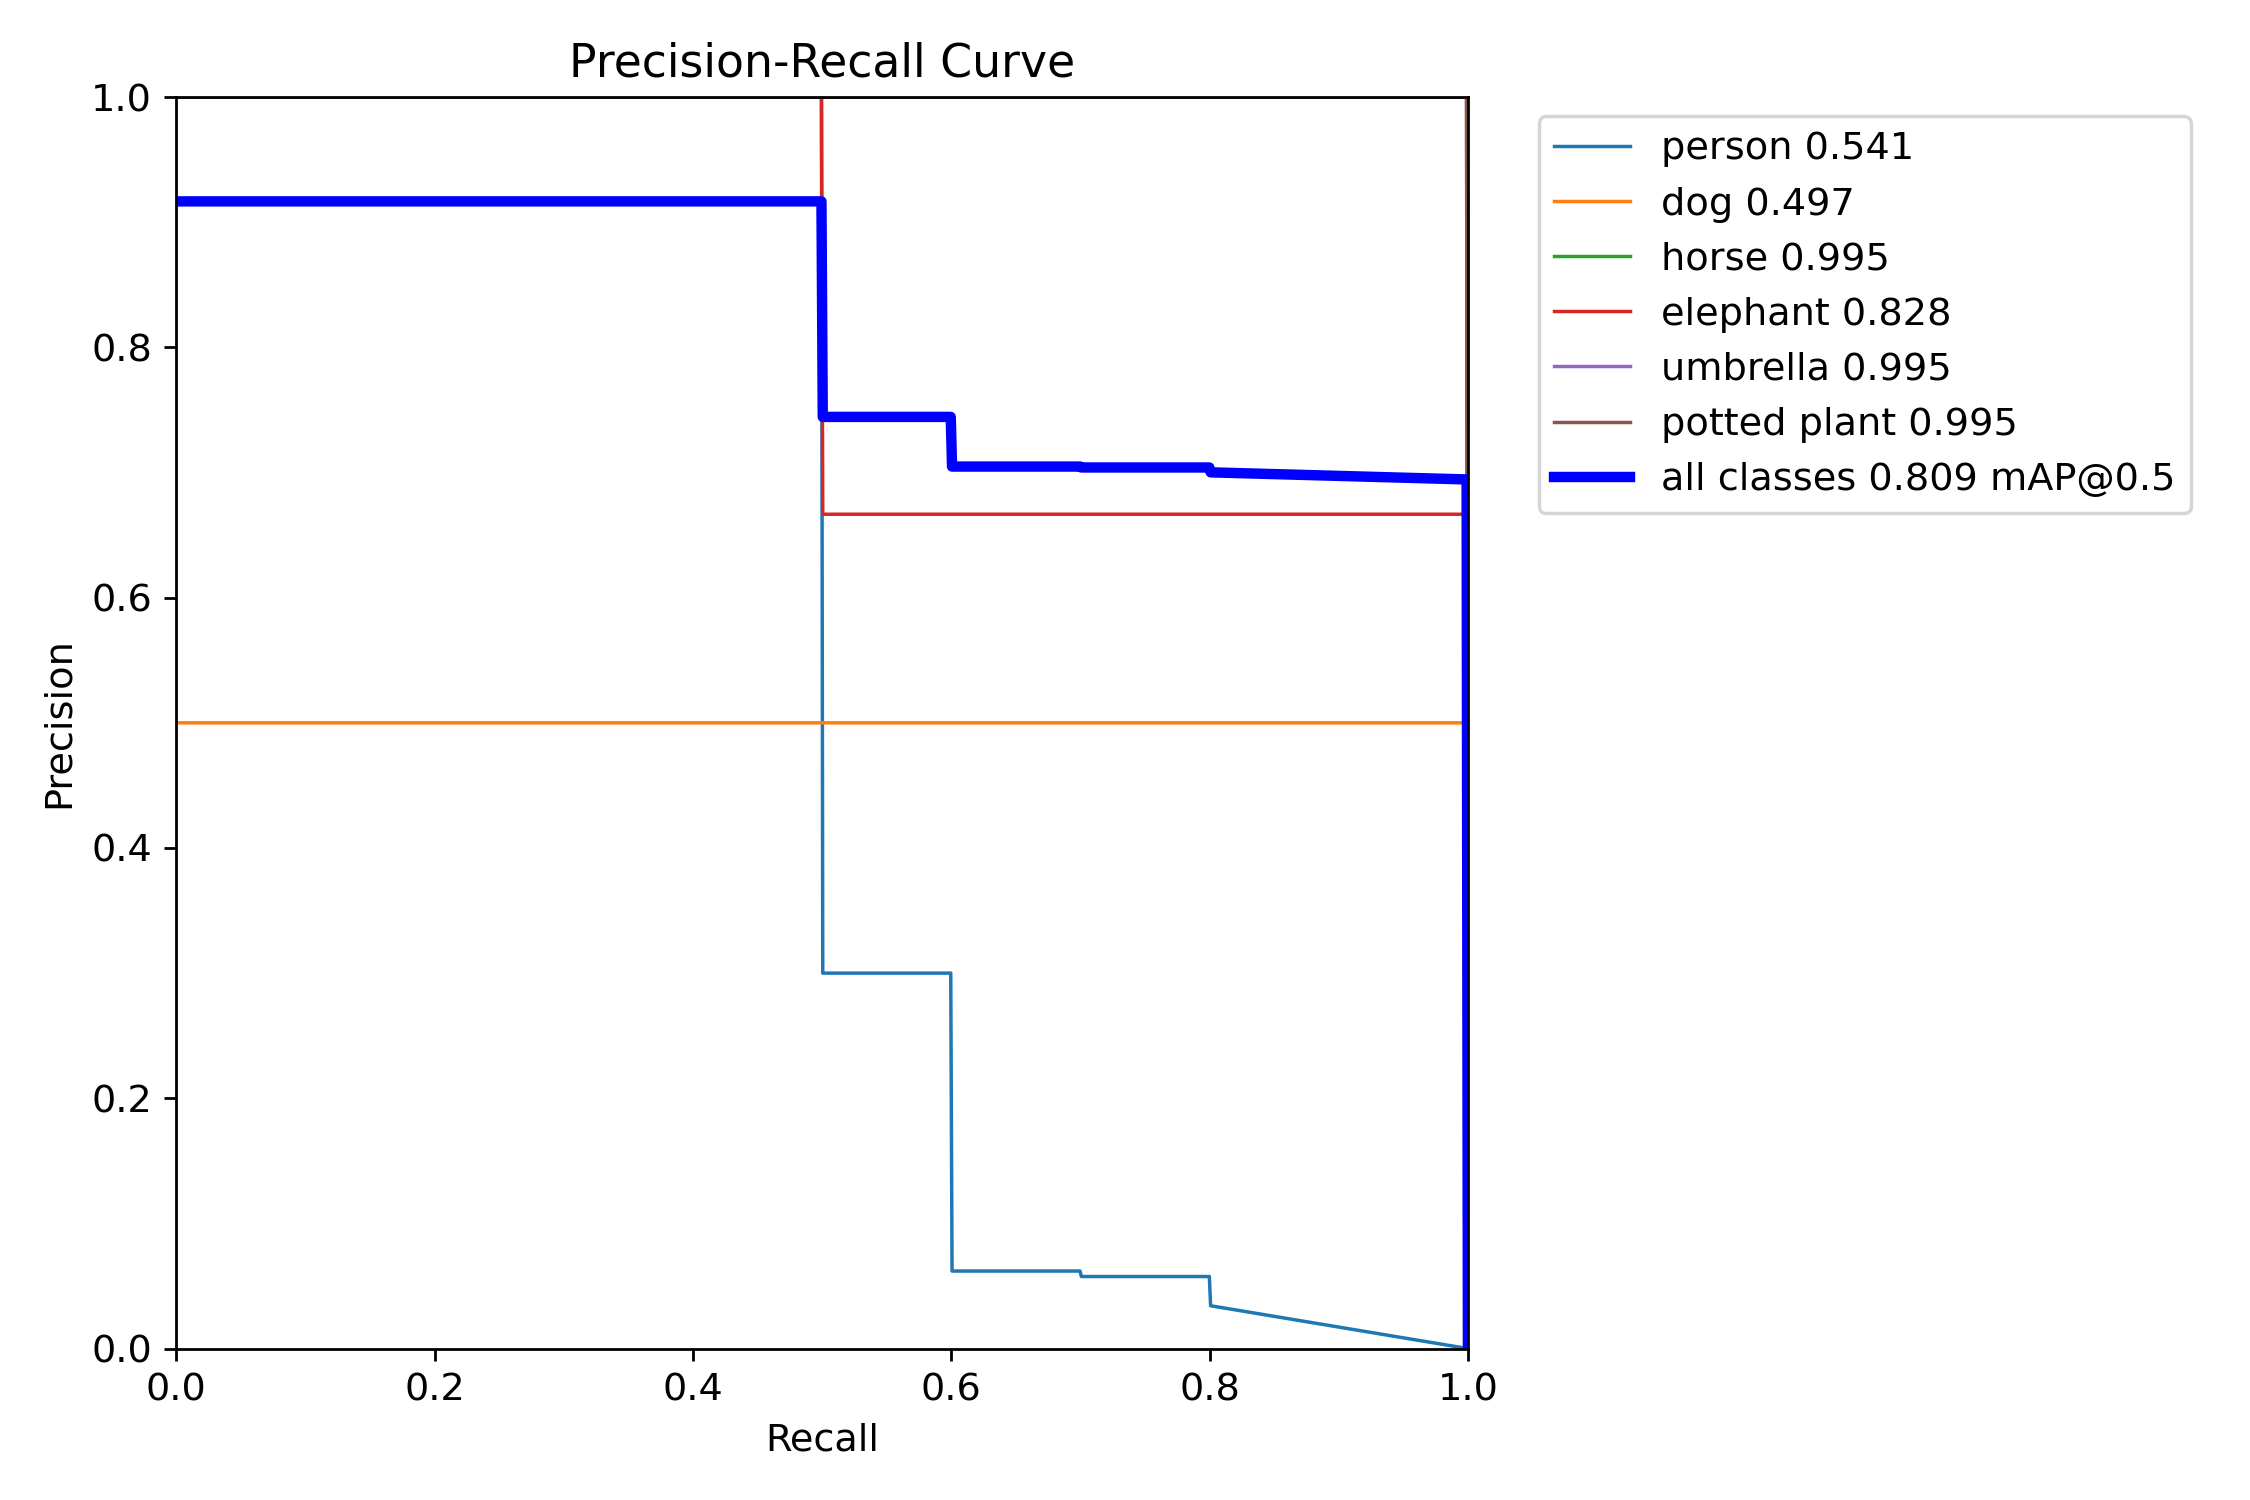

In [ ]:
Image(filename='runs/detect/val2/PR_curve.png', width = 700)

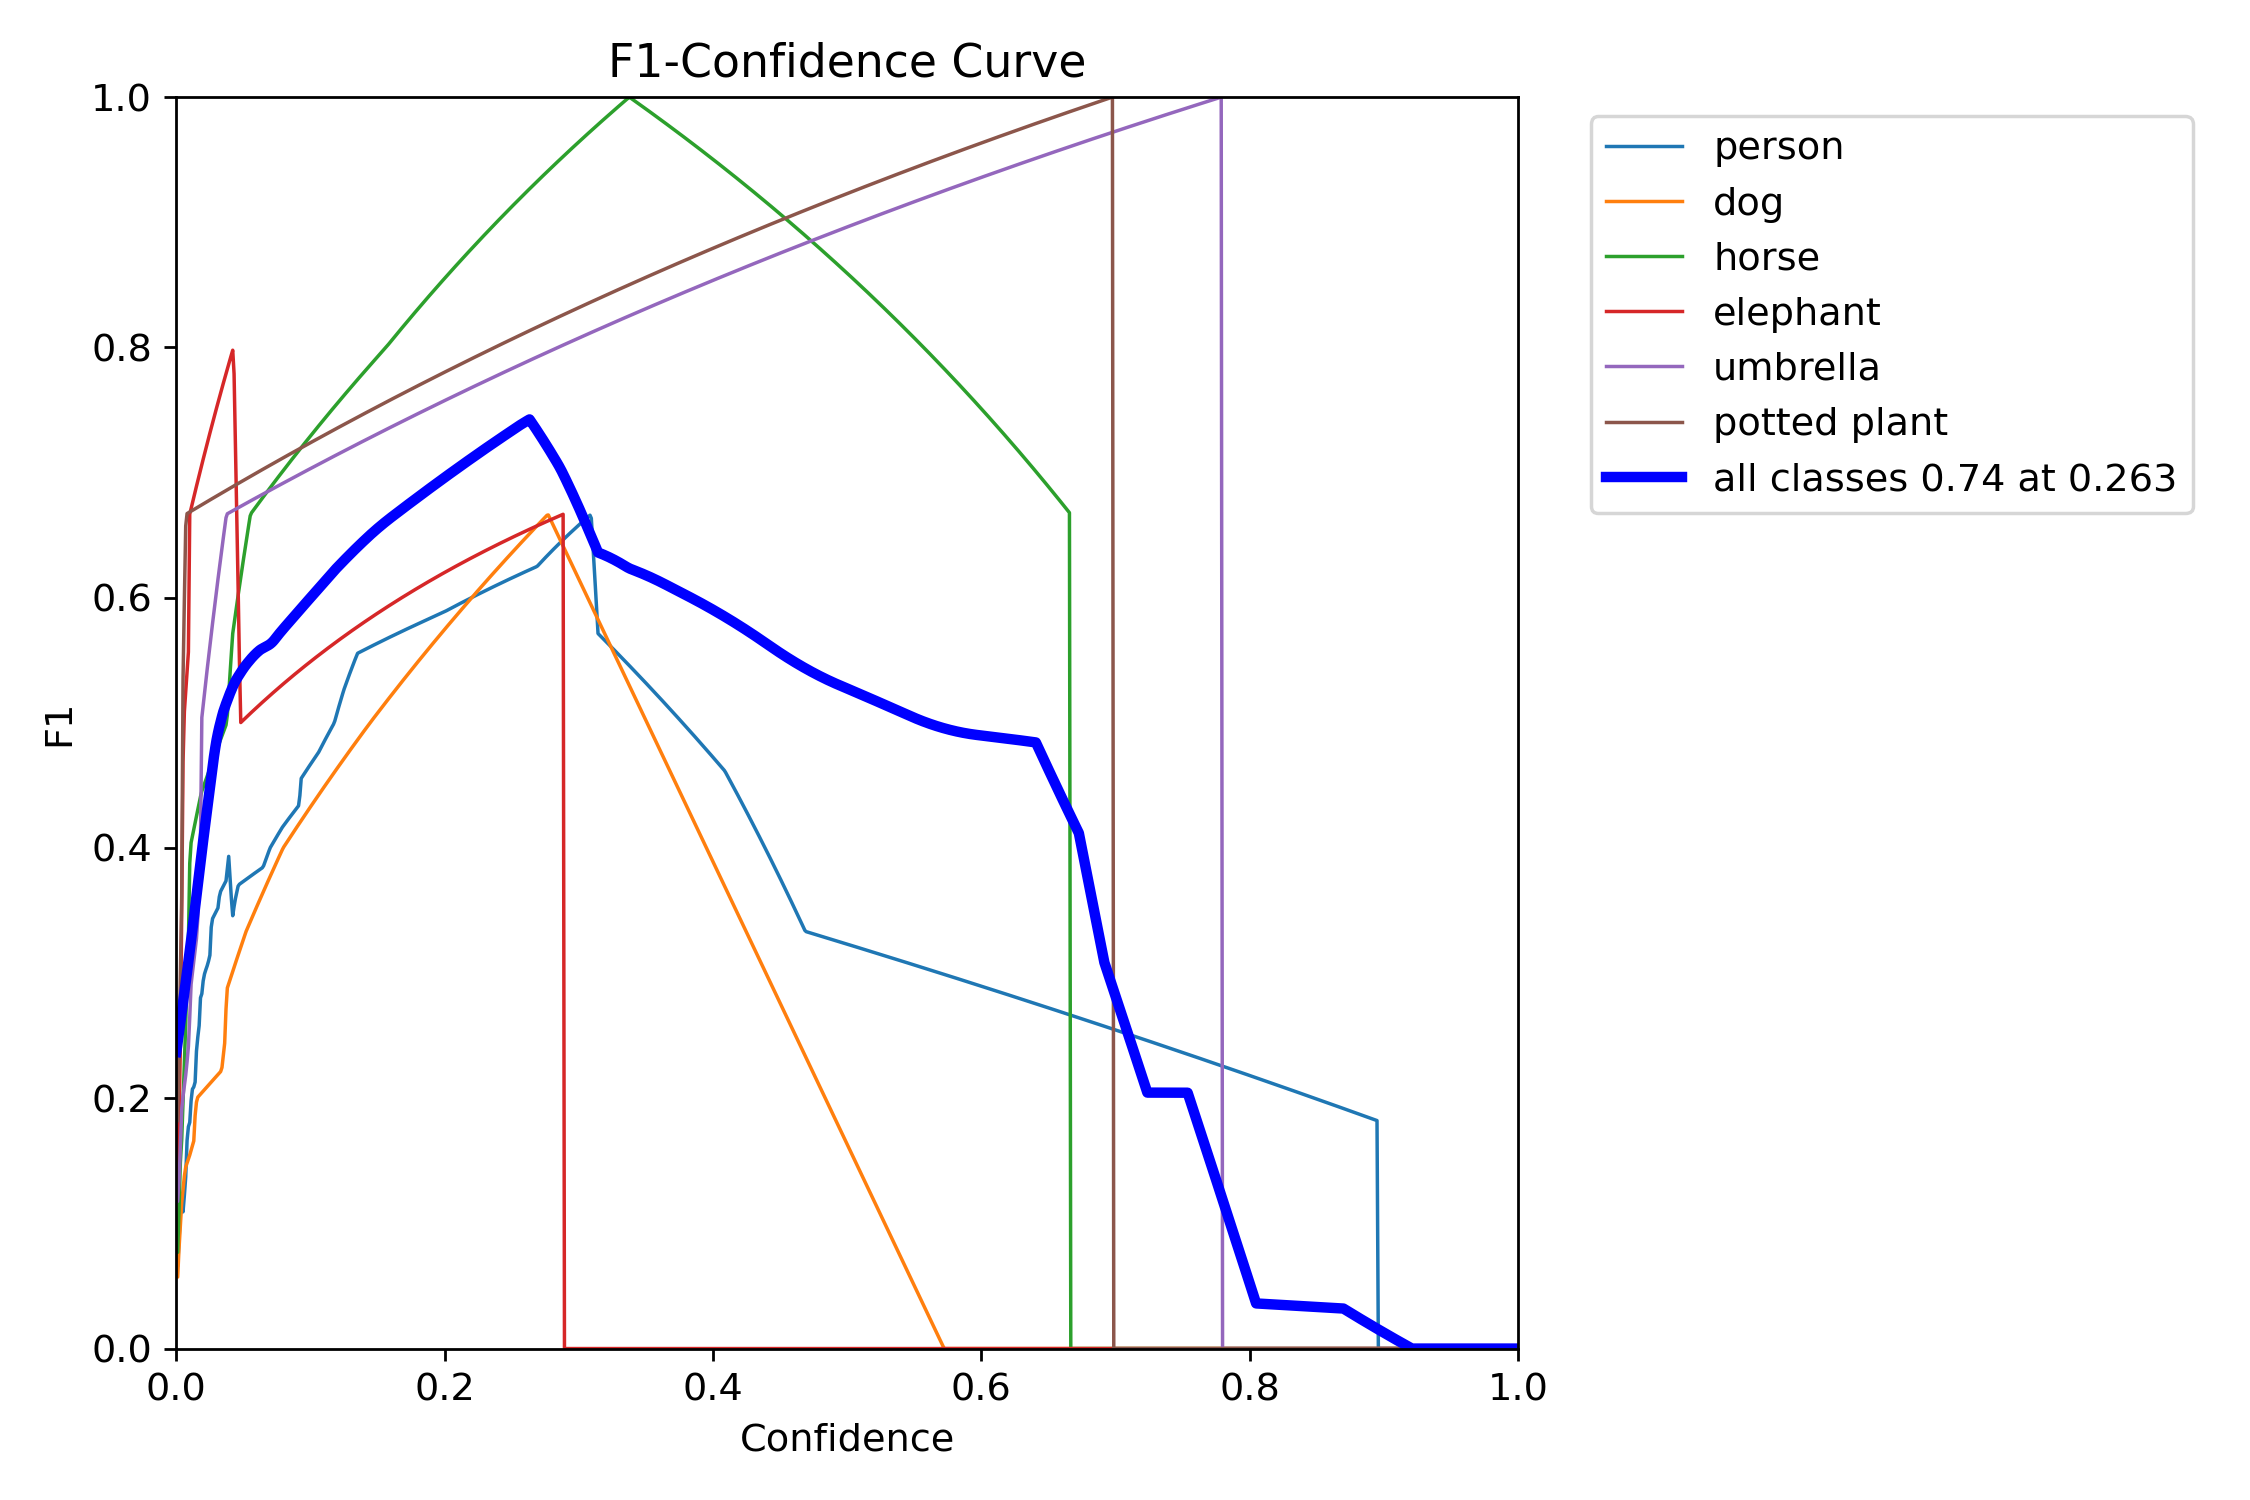

In [ ]:
Image(filename='runs/detect/val2/F1_curve.png', width = 700)

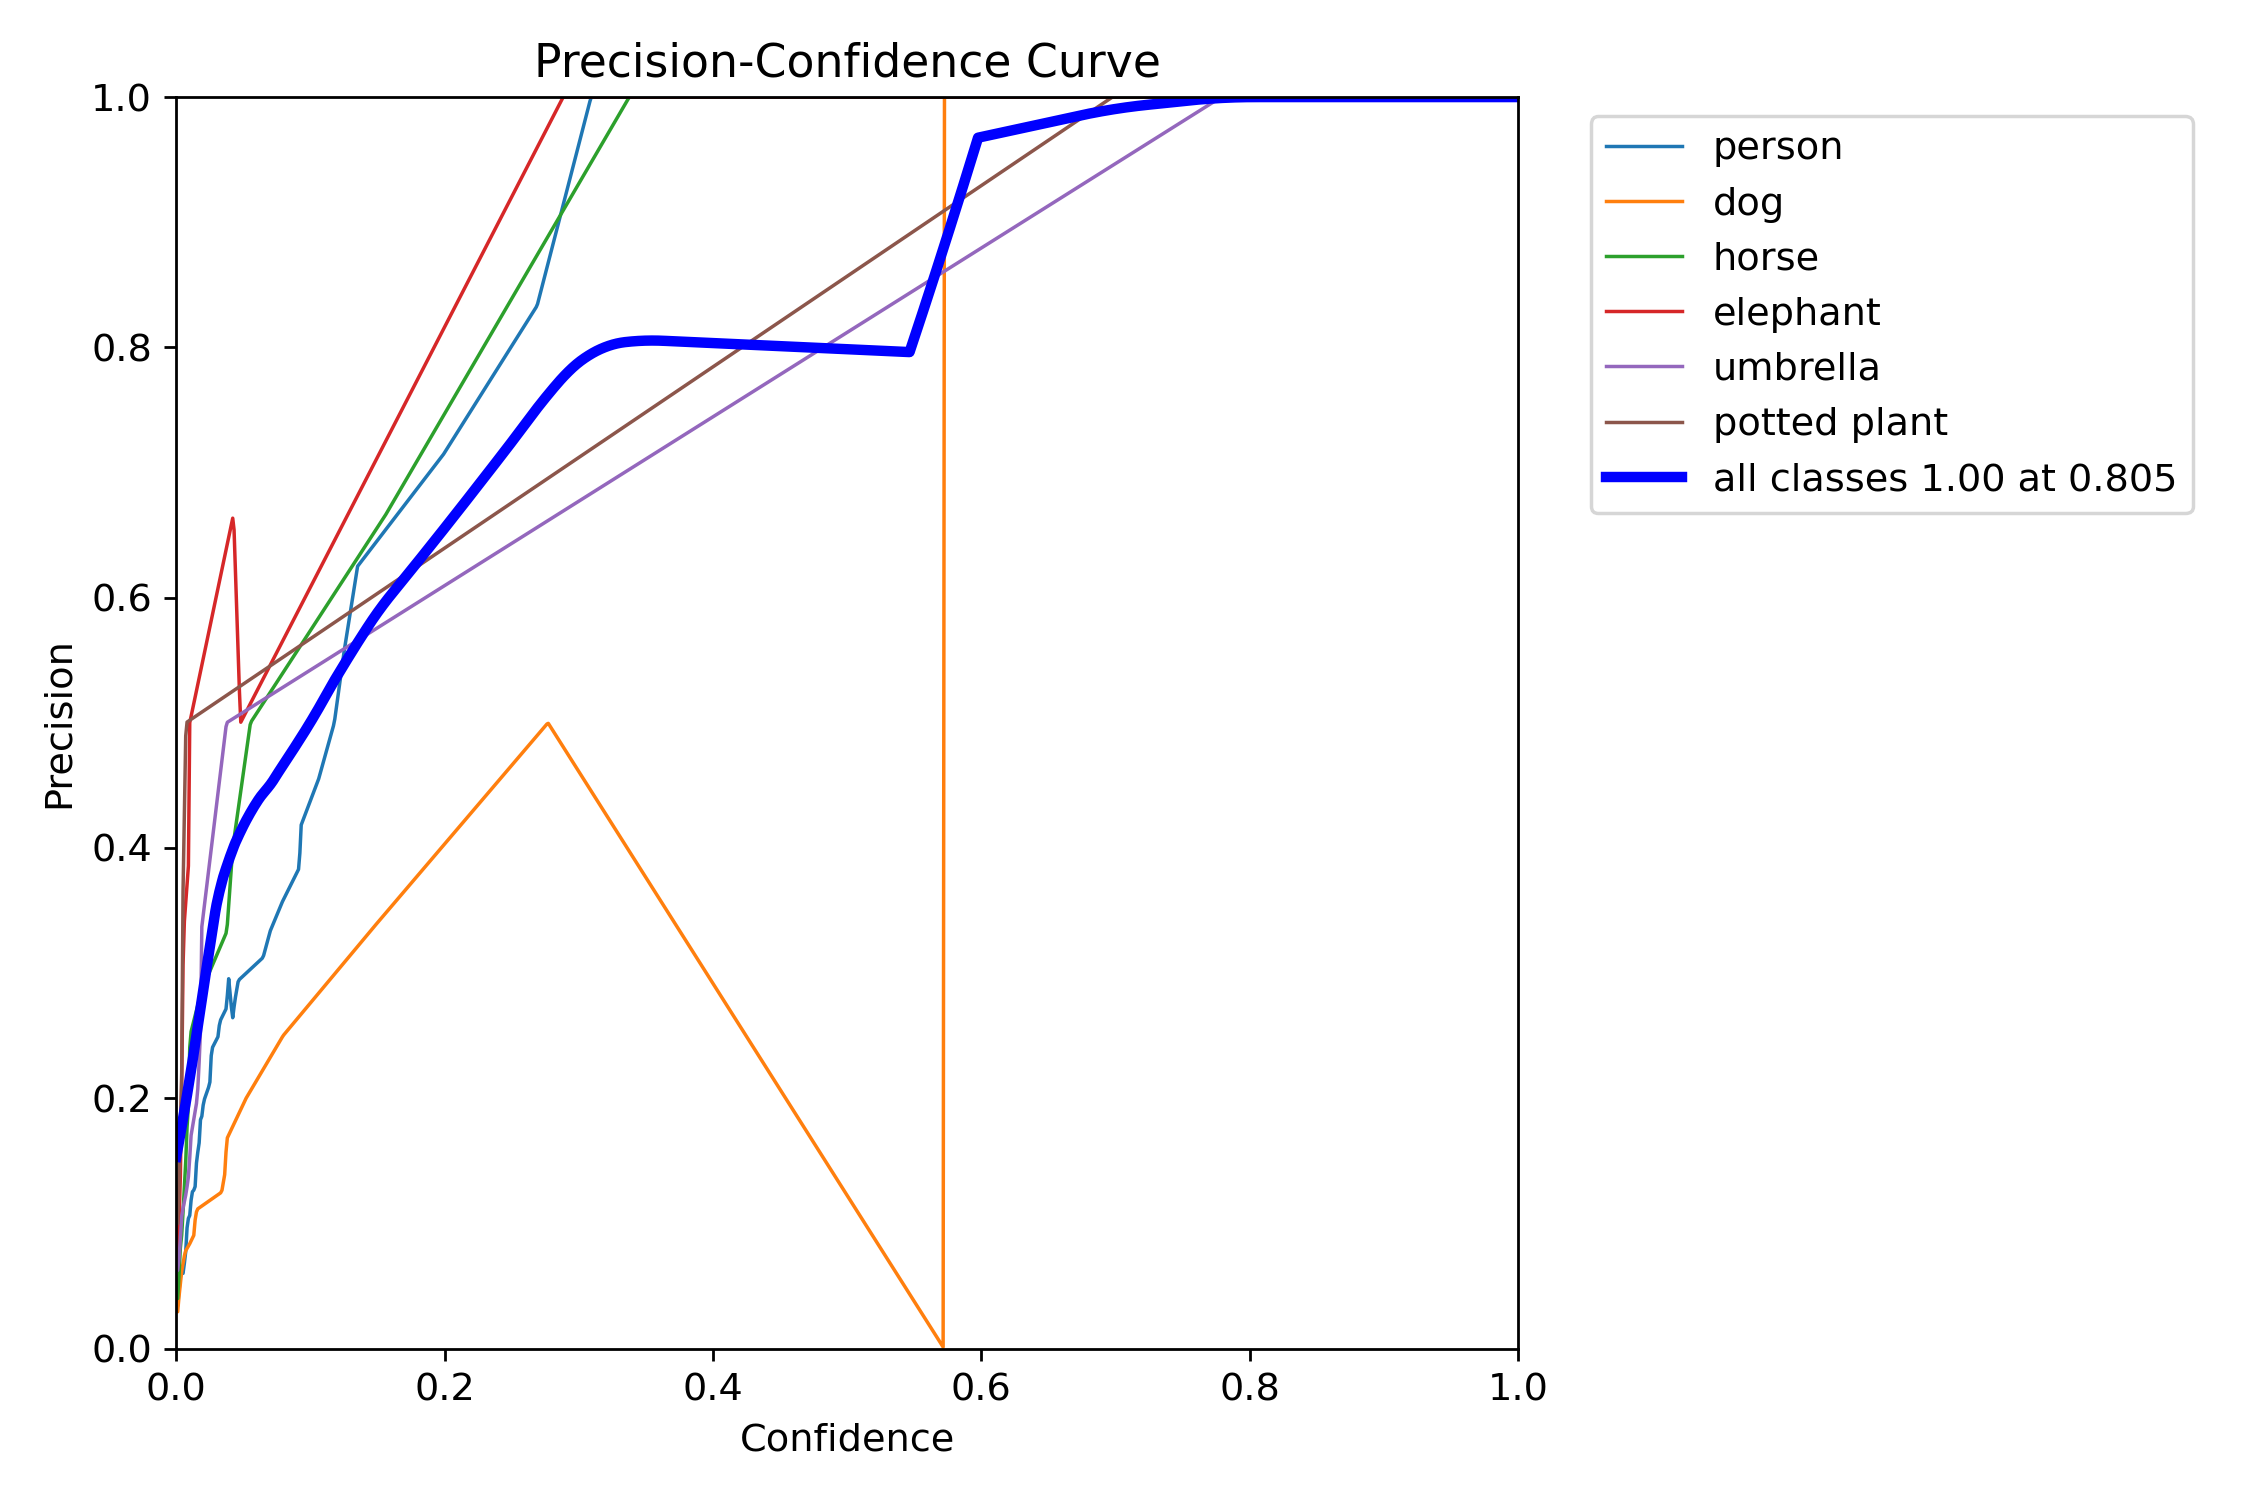

In [ ]:
Image(filename='runs/detect/val2/P_curve.png', width = 700)

In [ ]:
!yolo val model=yolov8n.torchscript data=coco8.yaml

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify', or 'pose'.
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Loading yolov8n.torchscript for TorchScript inference...
val: Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.72s/it]
                   all          4         17      0.708      0.833      0.809      0.609
                person          4         10      0.781        0.5      0.541      0.278
                   dog          4          1      0.451          1      0.497      0.348
                 horse          4          2      0.817          1      0.995      0.747
              elephant          4          2      0.896        0.5      0.828      0.392

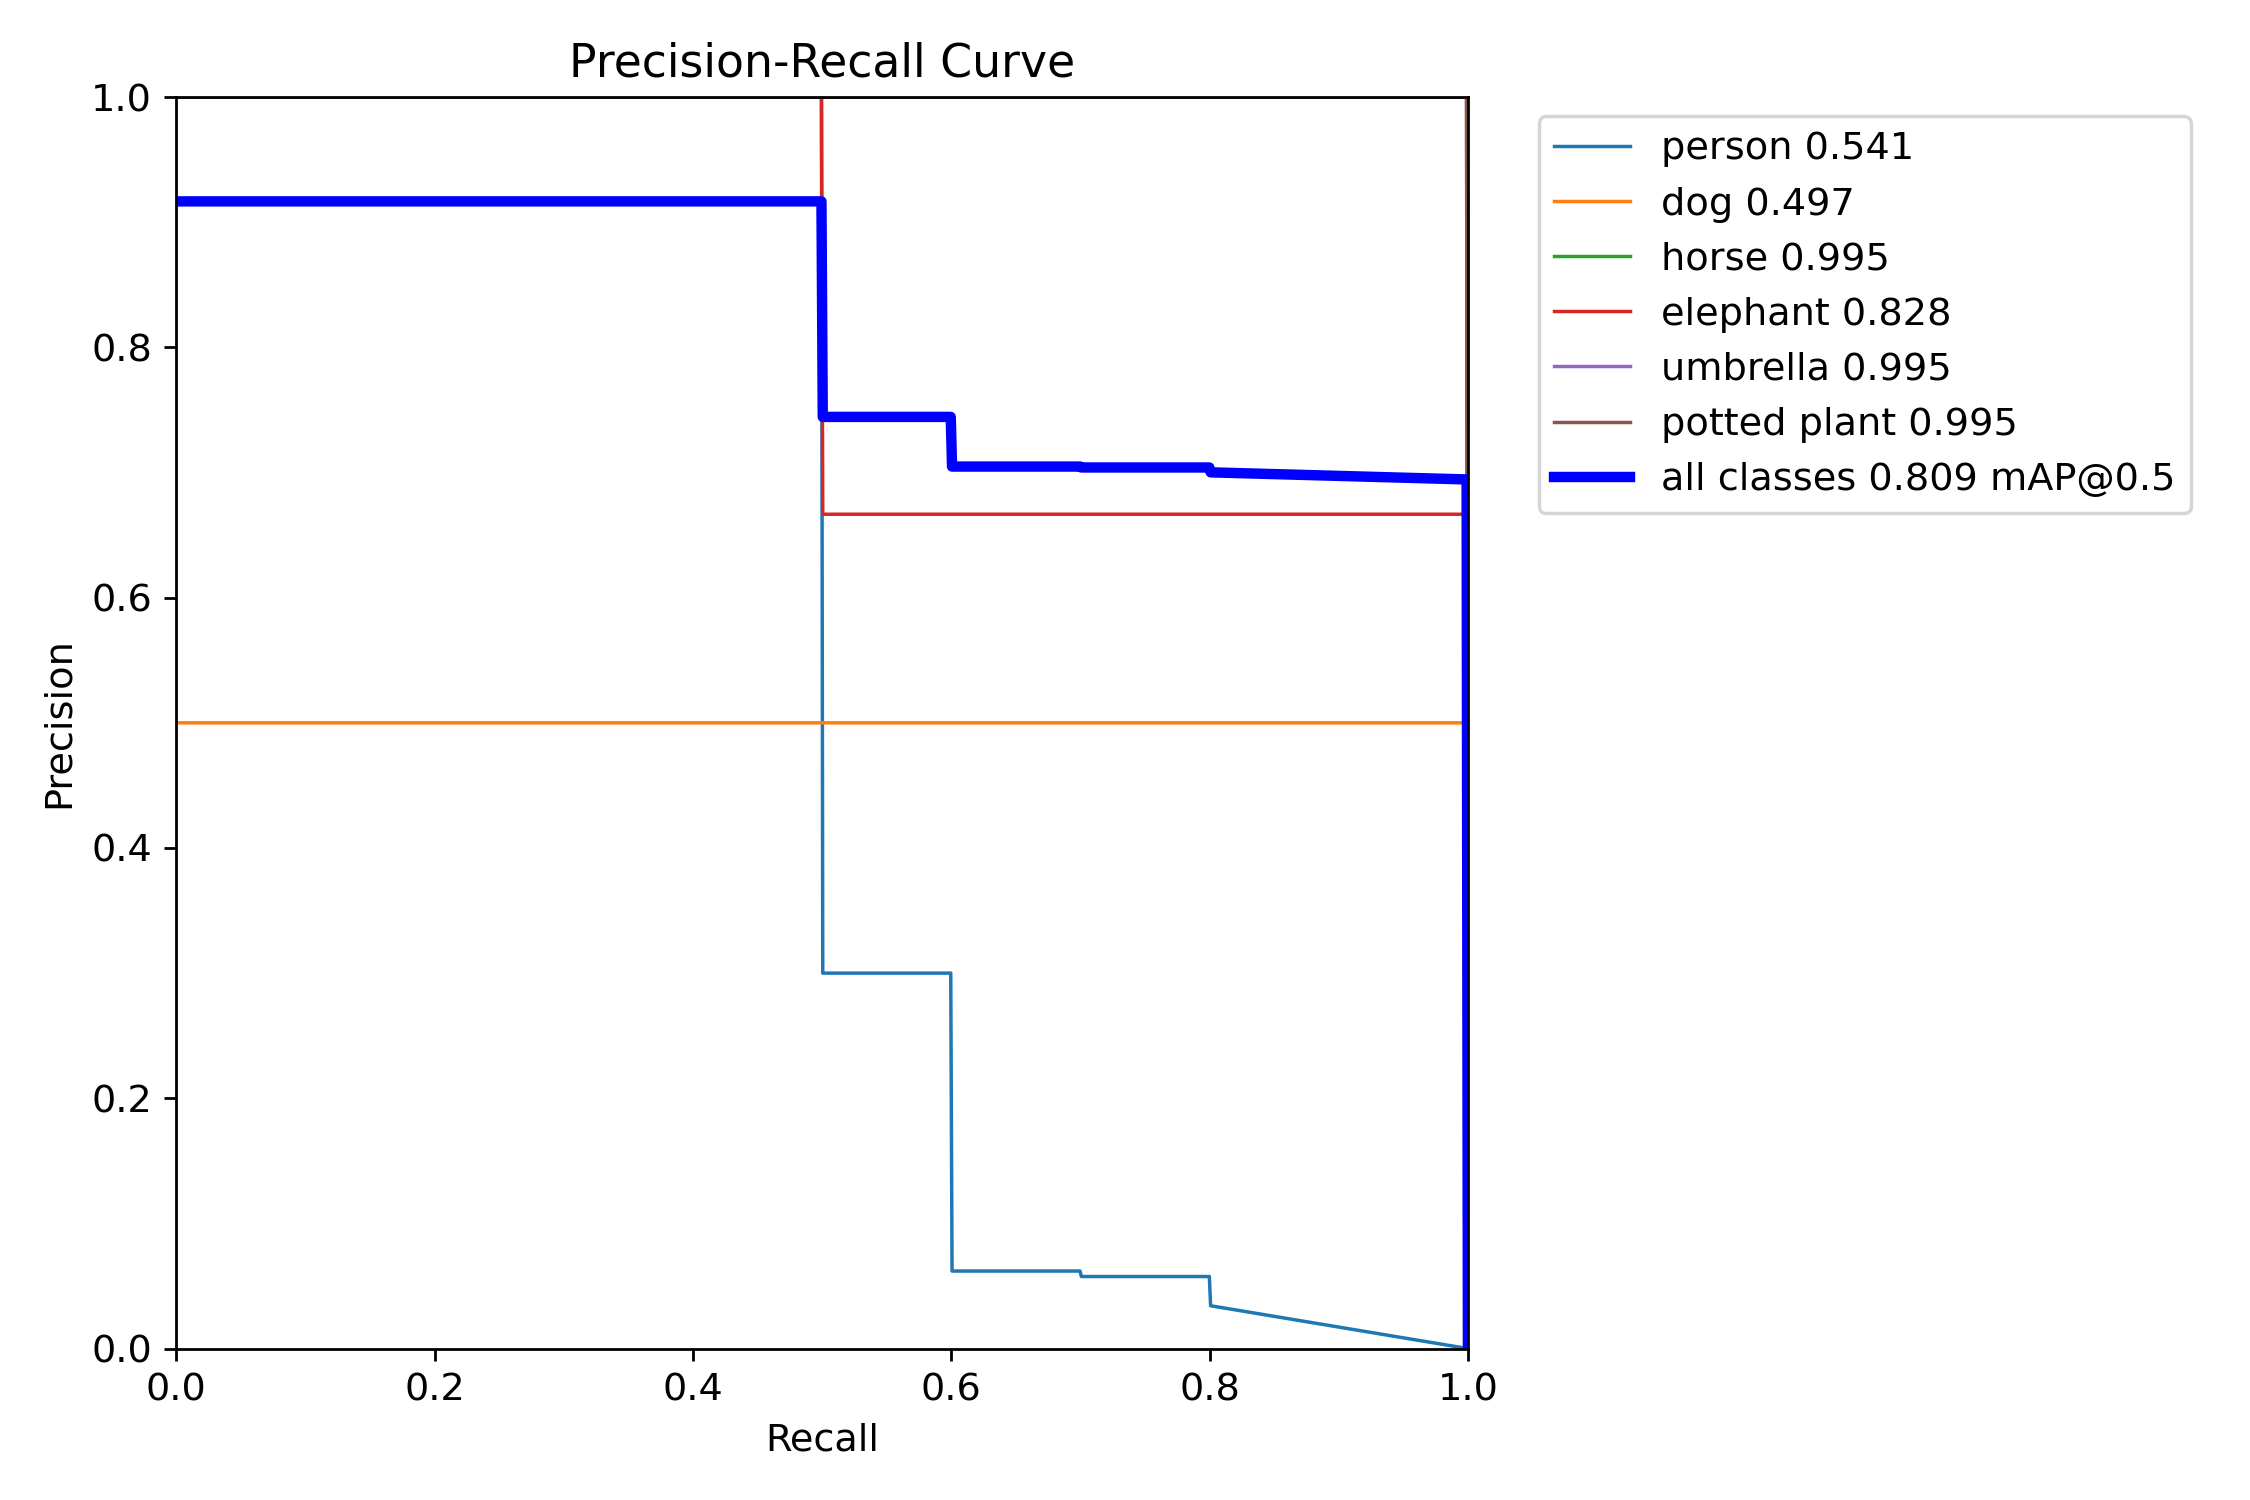

In [ ]:
Image(filename='runs/detect/val3/PR_curve.png', width = 700)

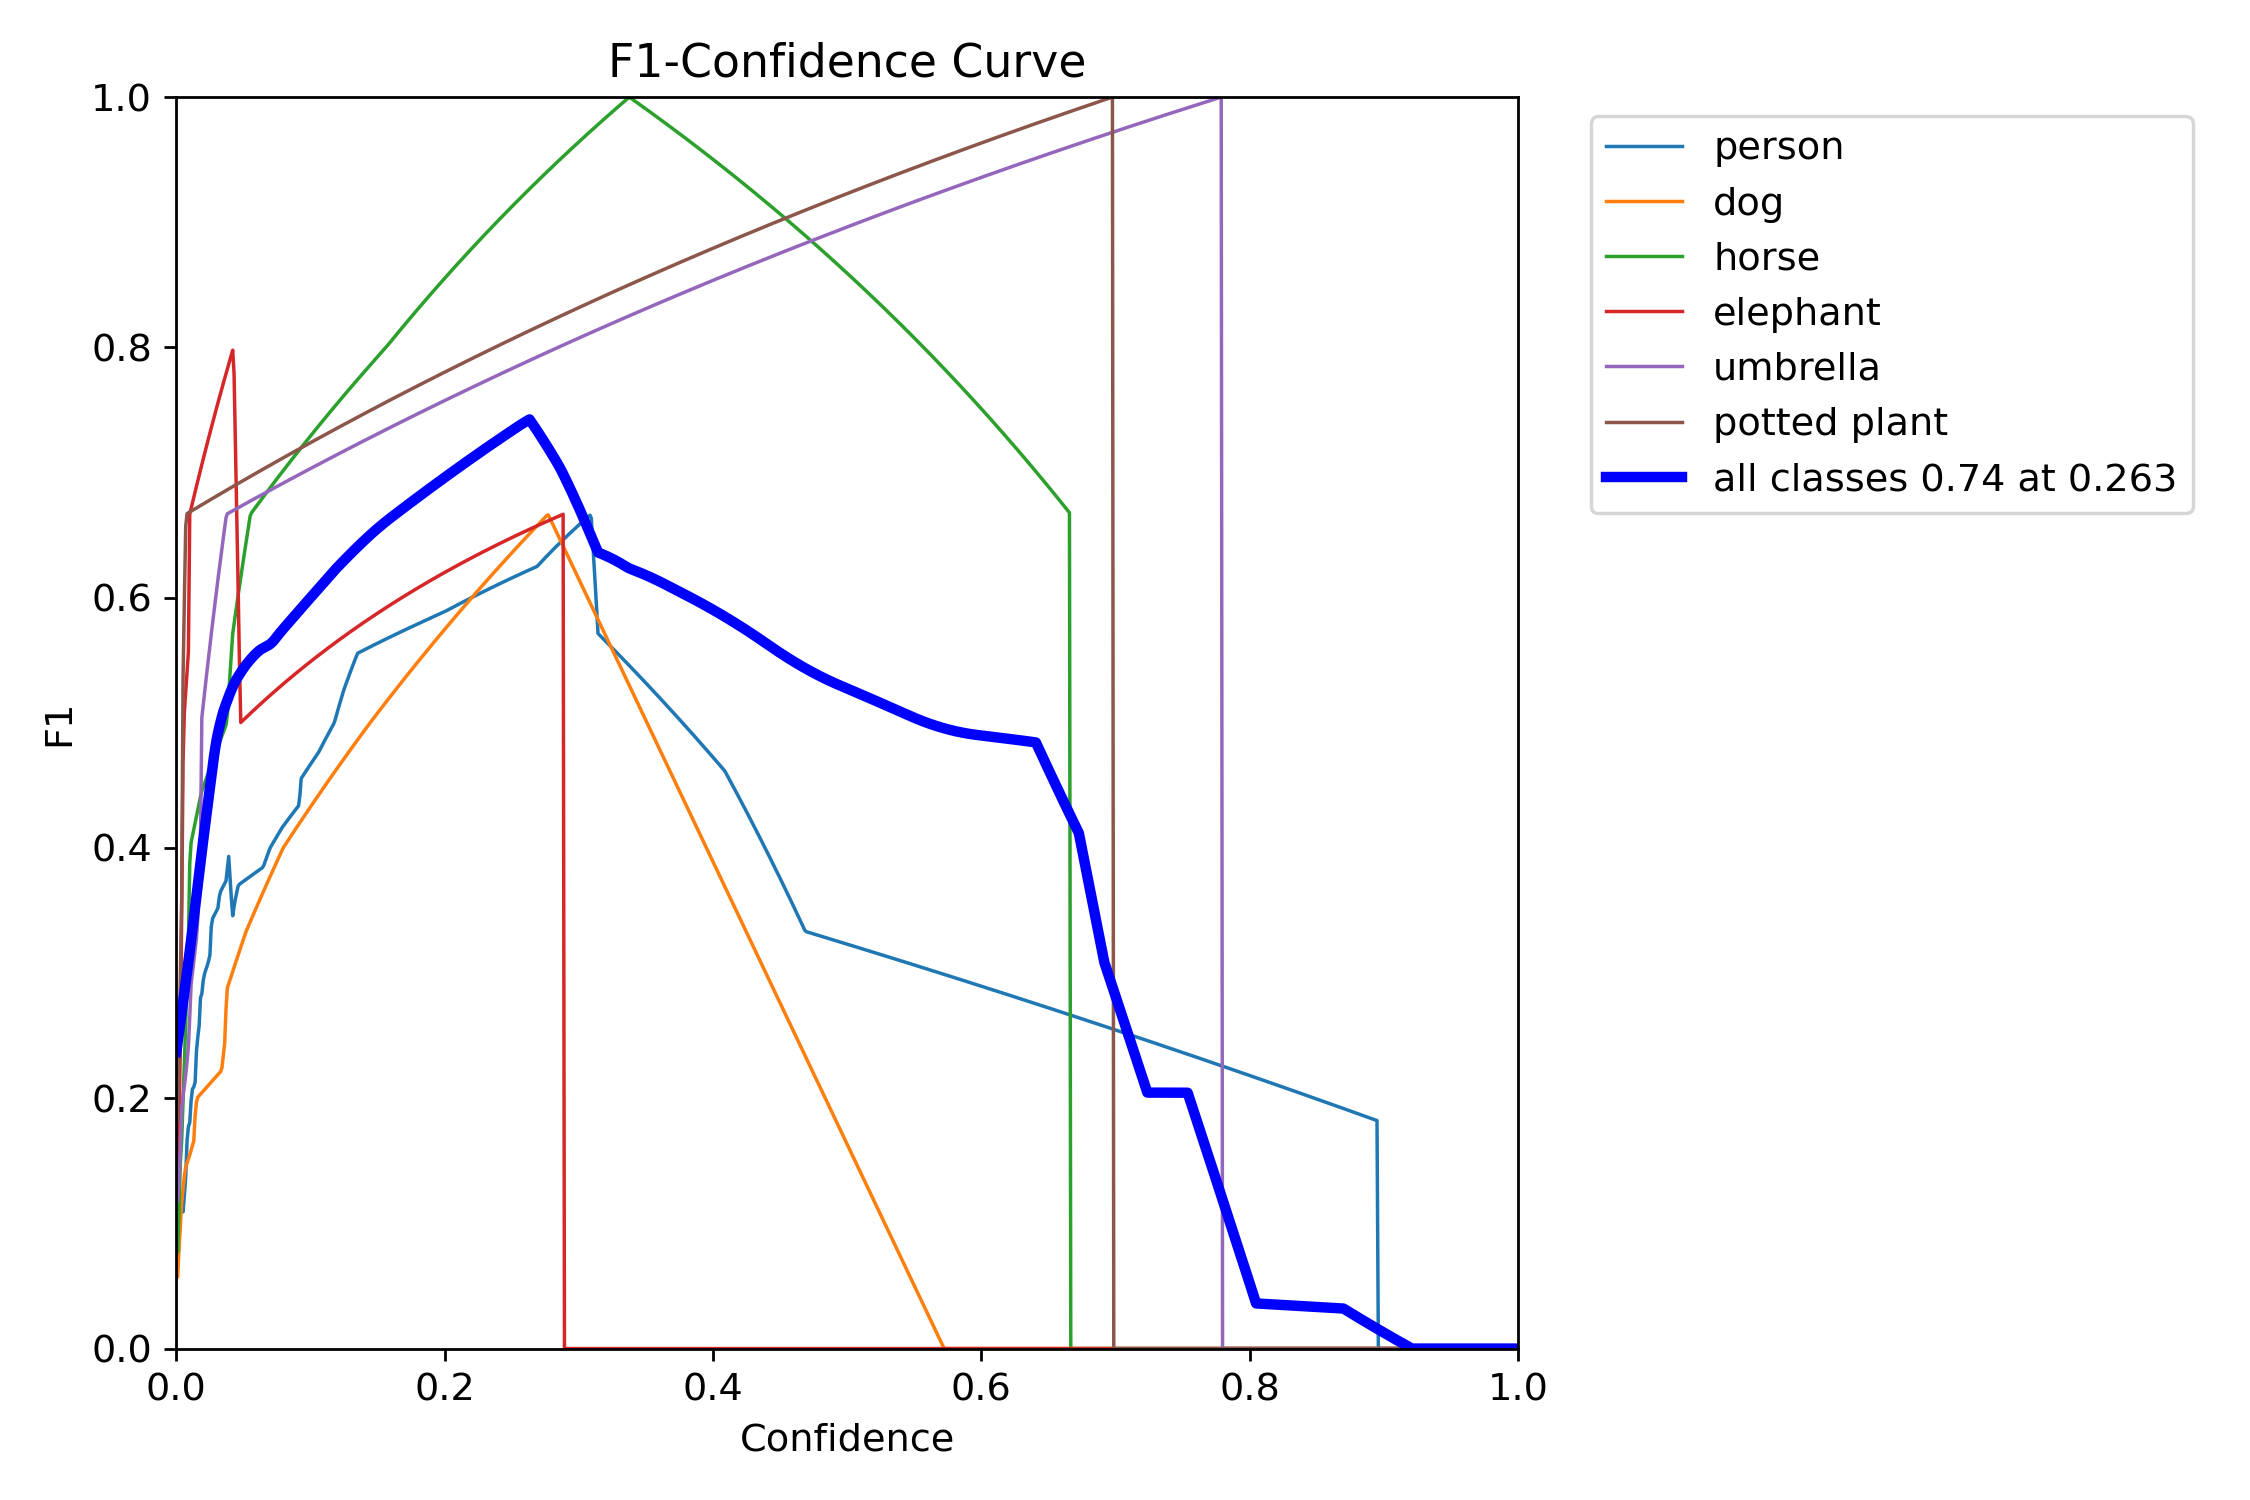

In [ ]:
Image(filename='runs/detect/val3/F1_curve.png', width = 700)

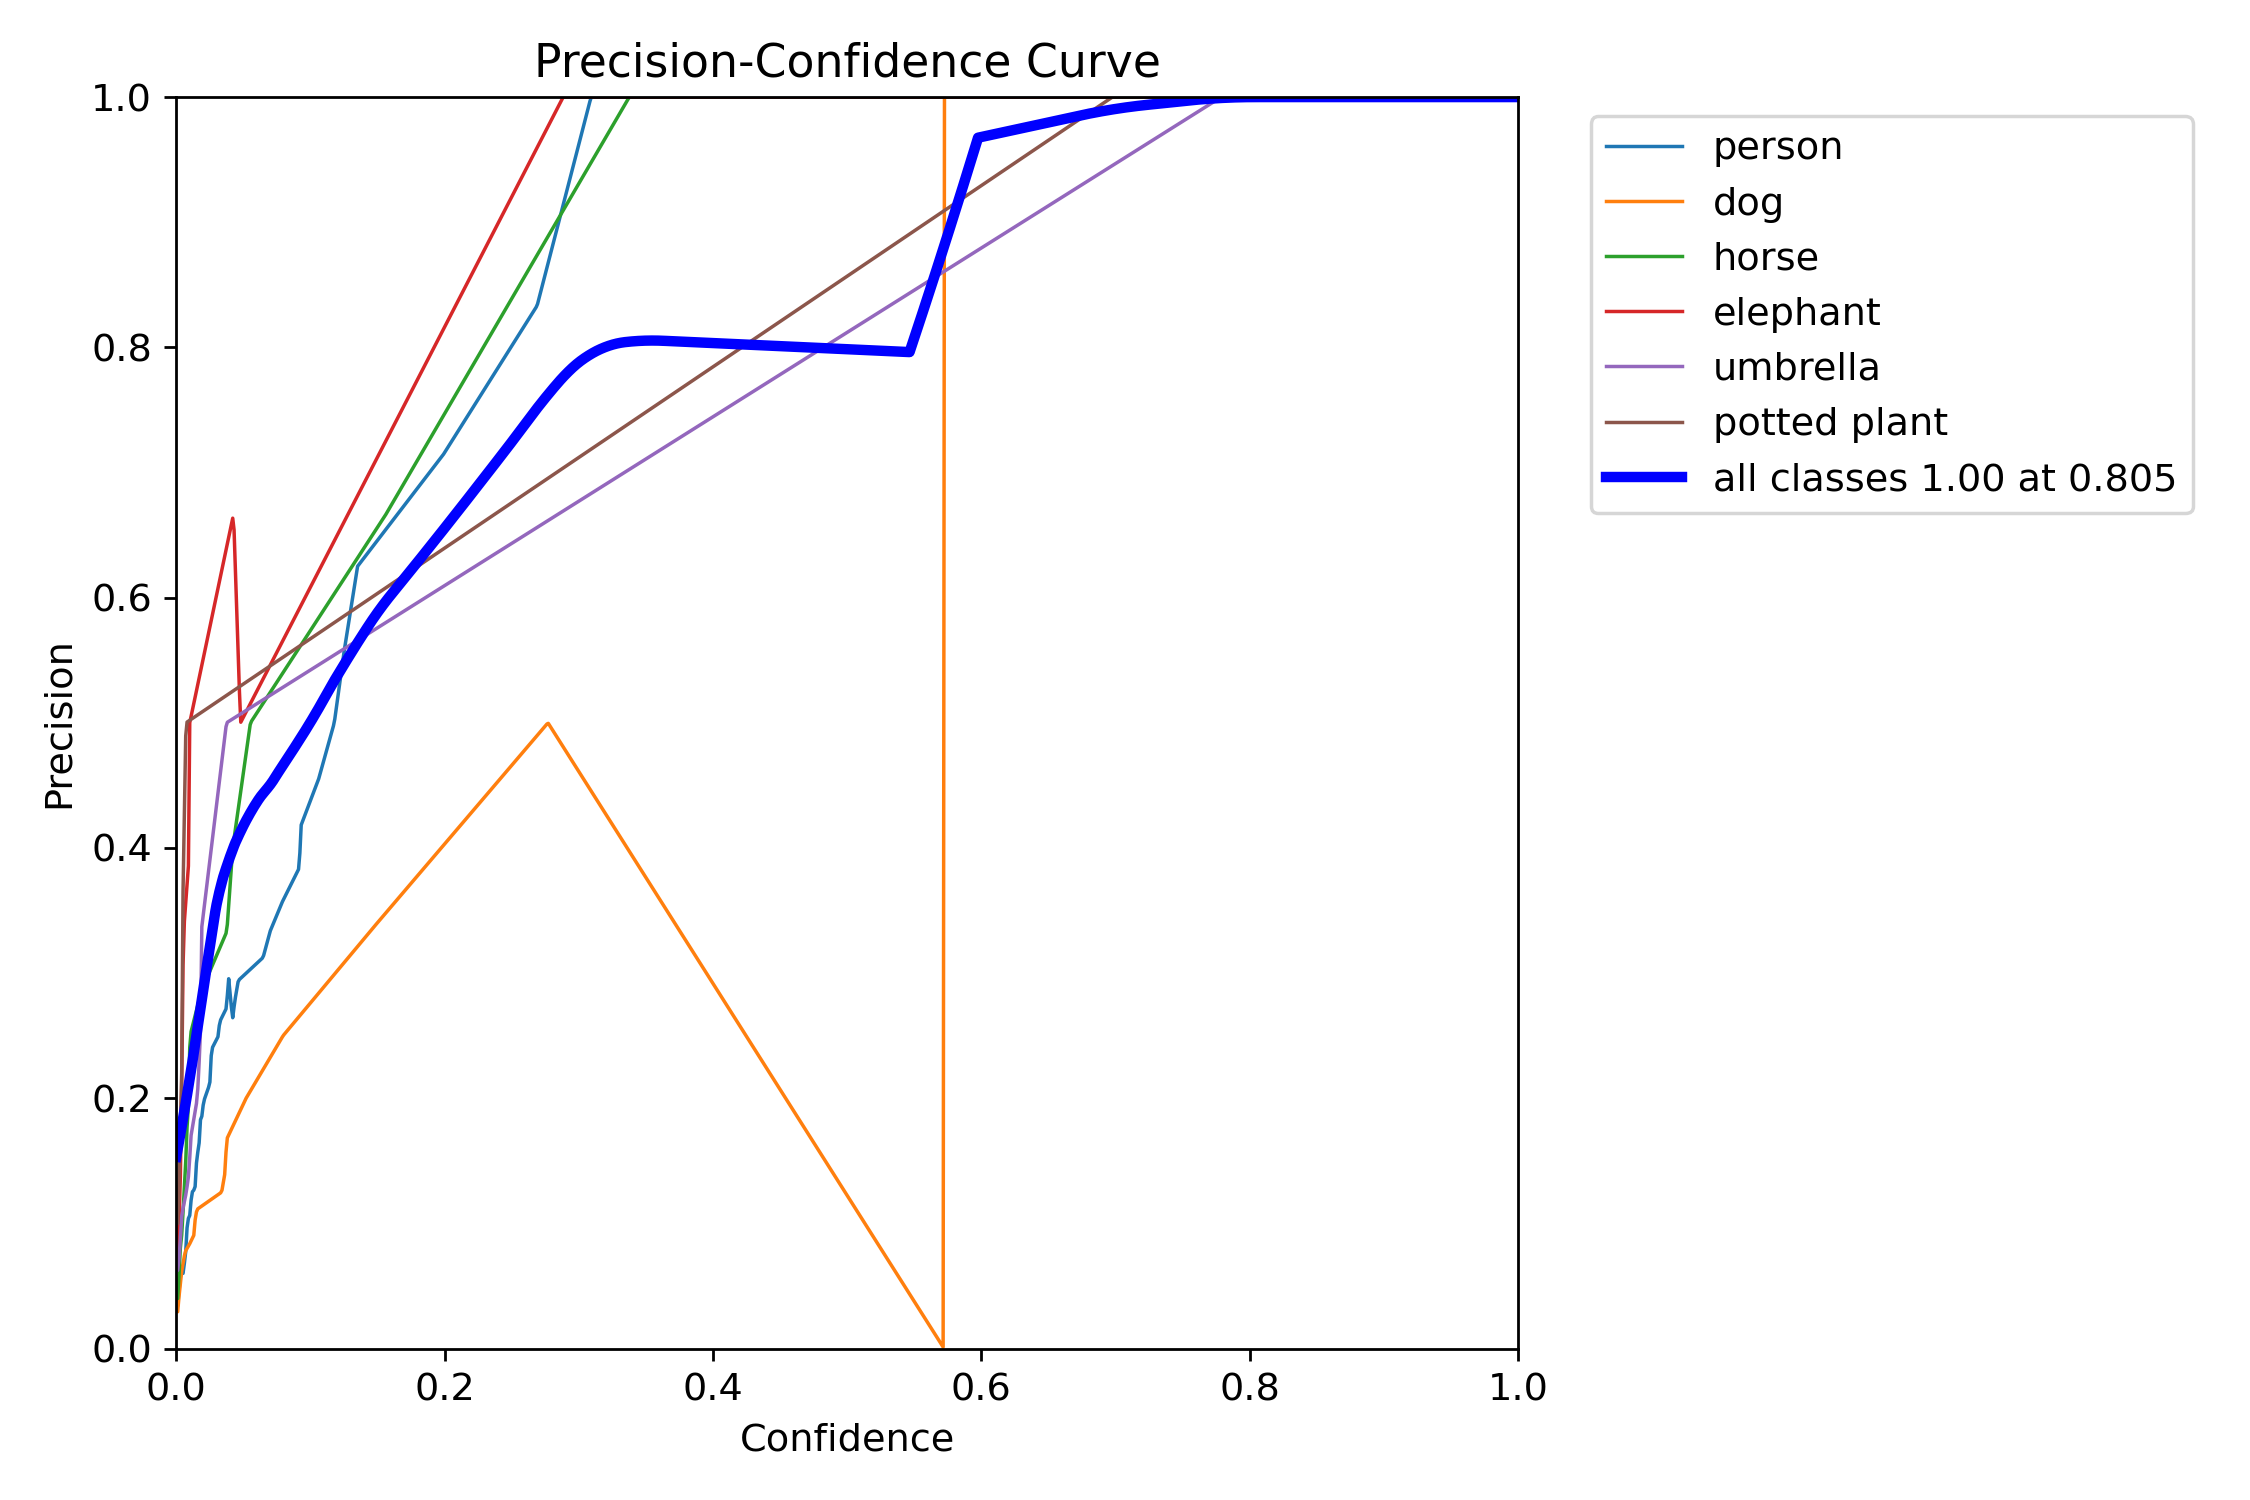

In [ ]:
Image(filename='runs/detect/val3/P_curve.png', width = 700)

In [ ]:
!yolo val model=yolov8n.engine data=coco8.yaml

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify', or 'pose'.
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Loading yolov8n.engine for TensorRT inference...
[12/26/2023-13:50:37] [TRT] [I] [MemUsageChange] Init CUDA: CPU +546, GPU +0, now: CPU 678, GPU 239 (MiB)
[12/26/2023-13:50:37] [TRT] [I] Loaded engine size: 15 MiB
[12/26/2023-13:50:37] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +8, GPU +36, now: CPU 733, GPU 291 (MiB)
[12/26/2023-13:50:37] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engine deserialization: CPU +0, GPU +0, now: CPU 0, GPU 0 (MiB)
[12/26/2023-13:50:37] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +32, now: CPU 717, GPU 291 (MiB)
[12/26/2023-13:50:37] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in IExecutionContext creation: CPU +0, GPU +0, now: CPU 0, GPU 0 (MiB)

Dataset 'coco8.yaml' im

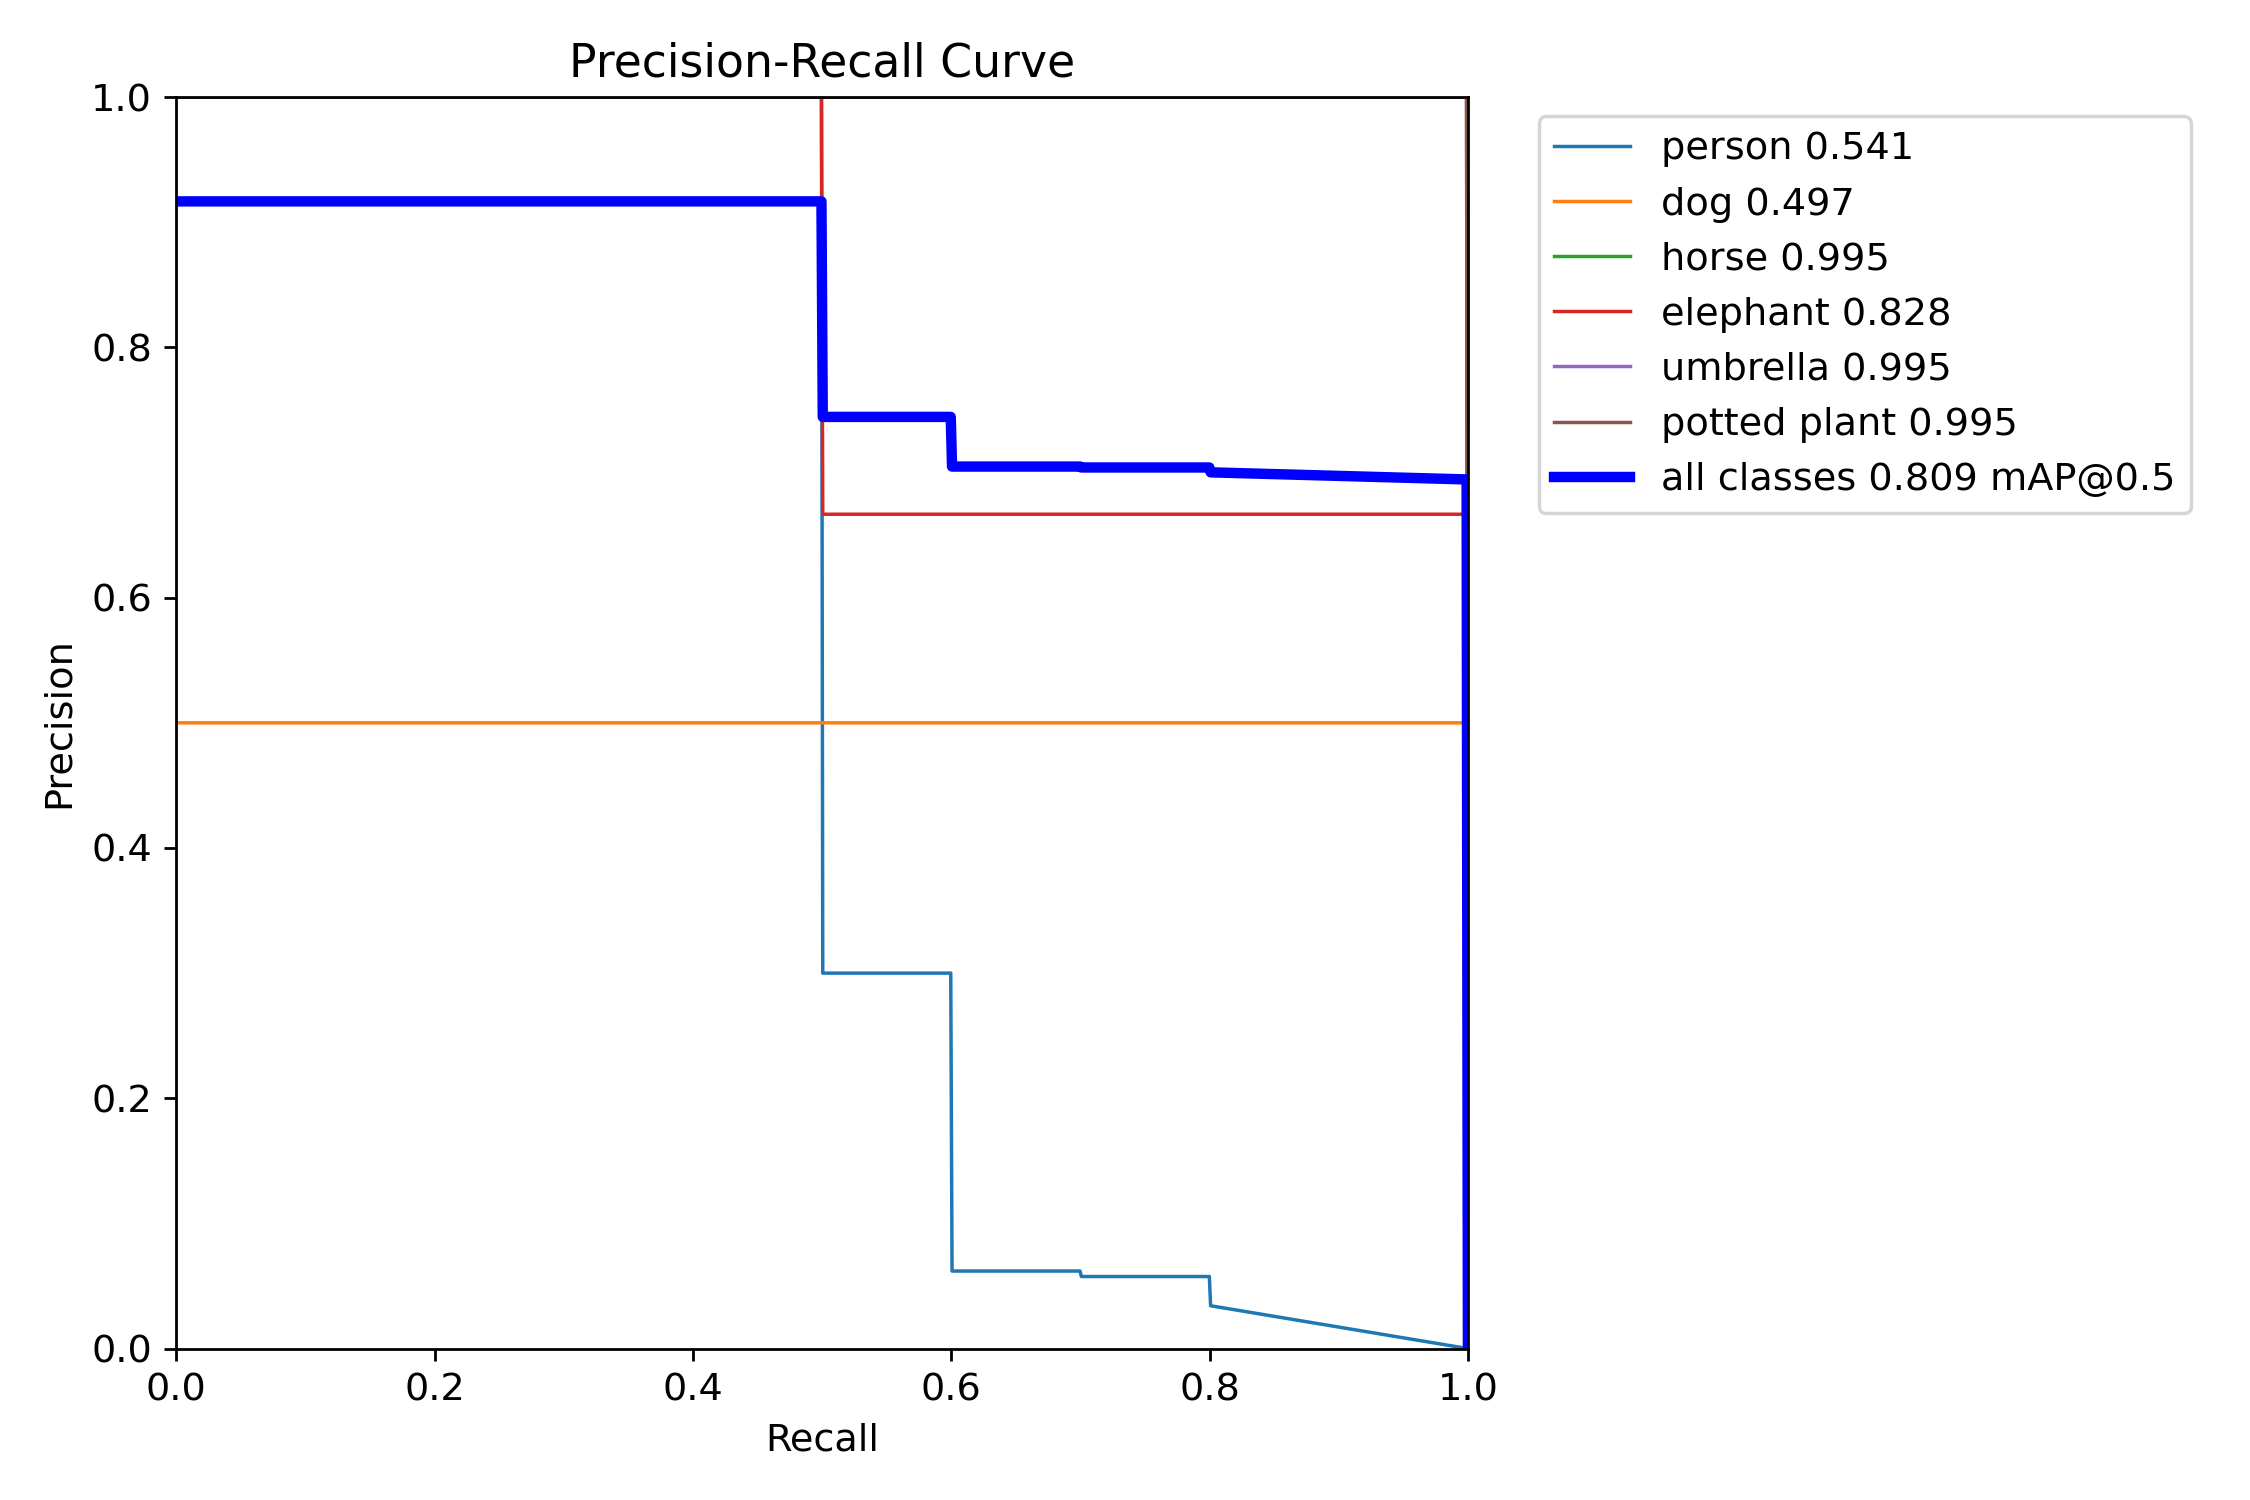

In [ ]:
Image(filename='runs/detect/val/PR_curve.png', width = 700)

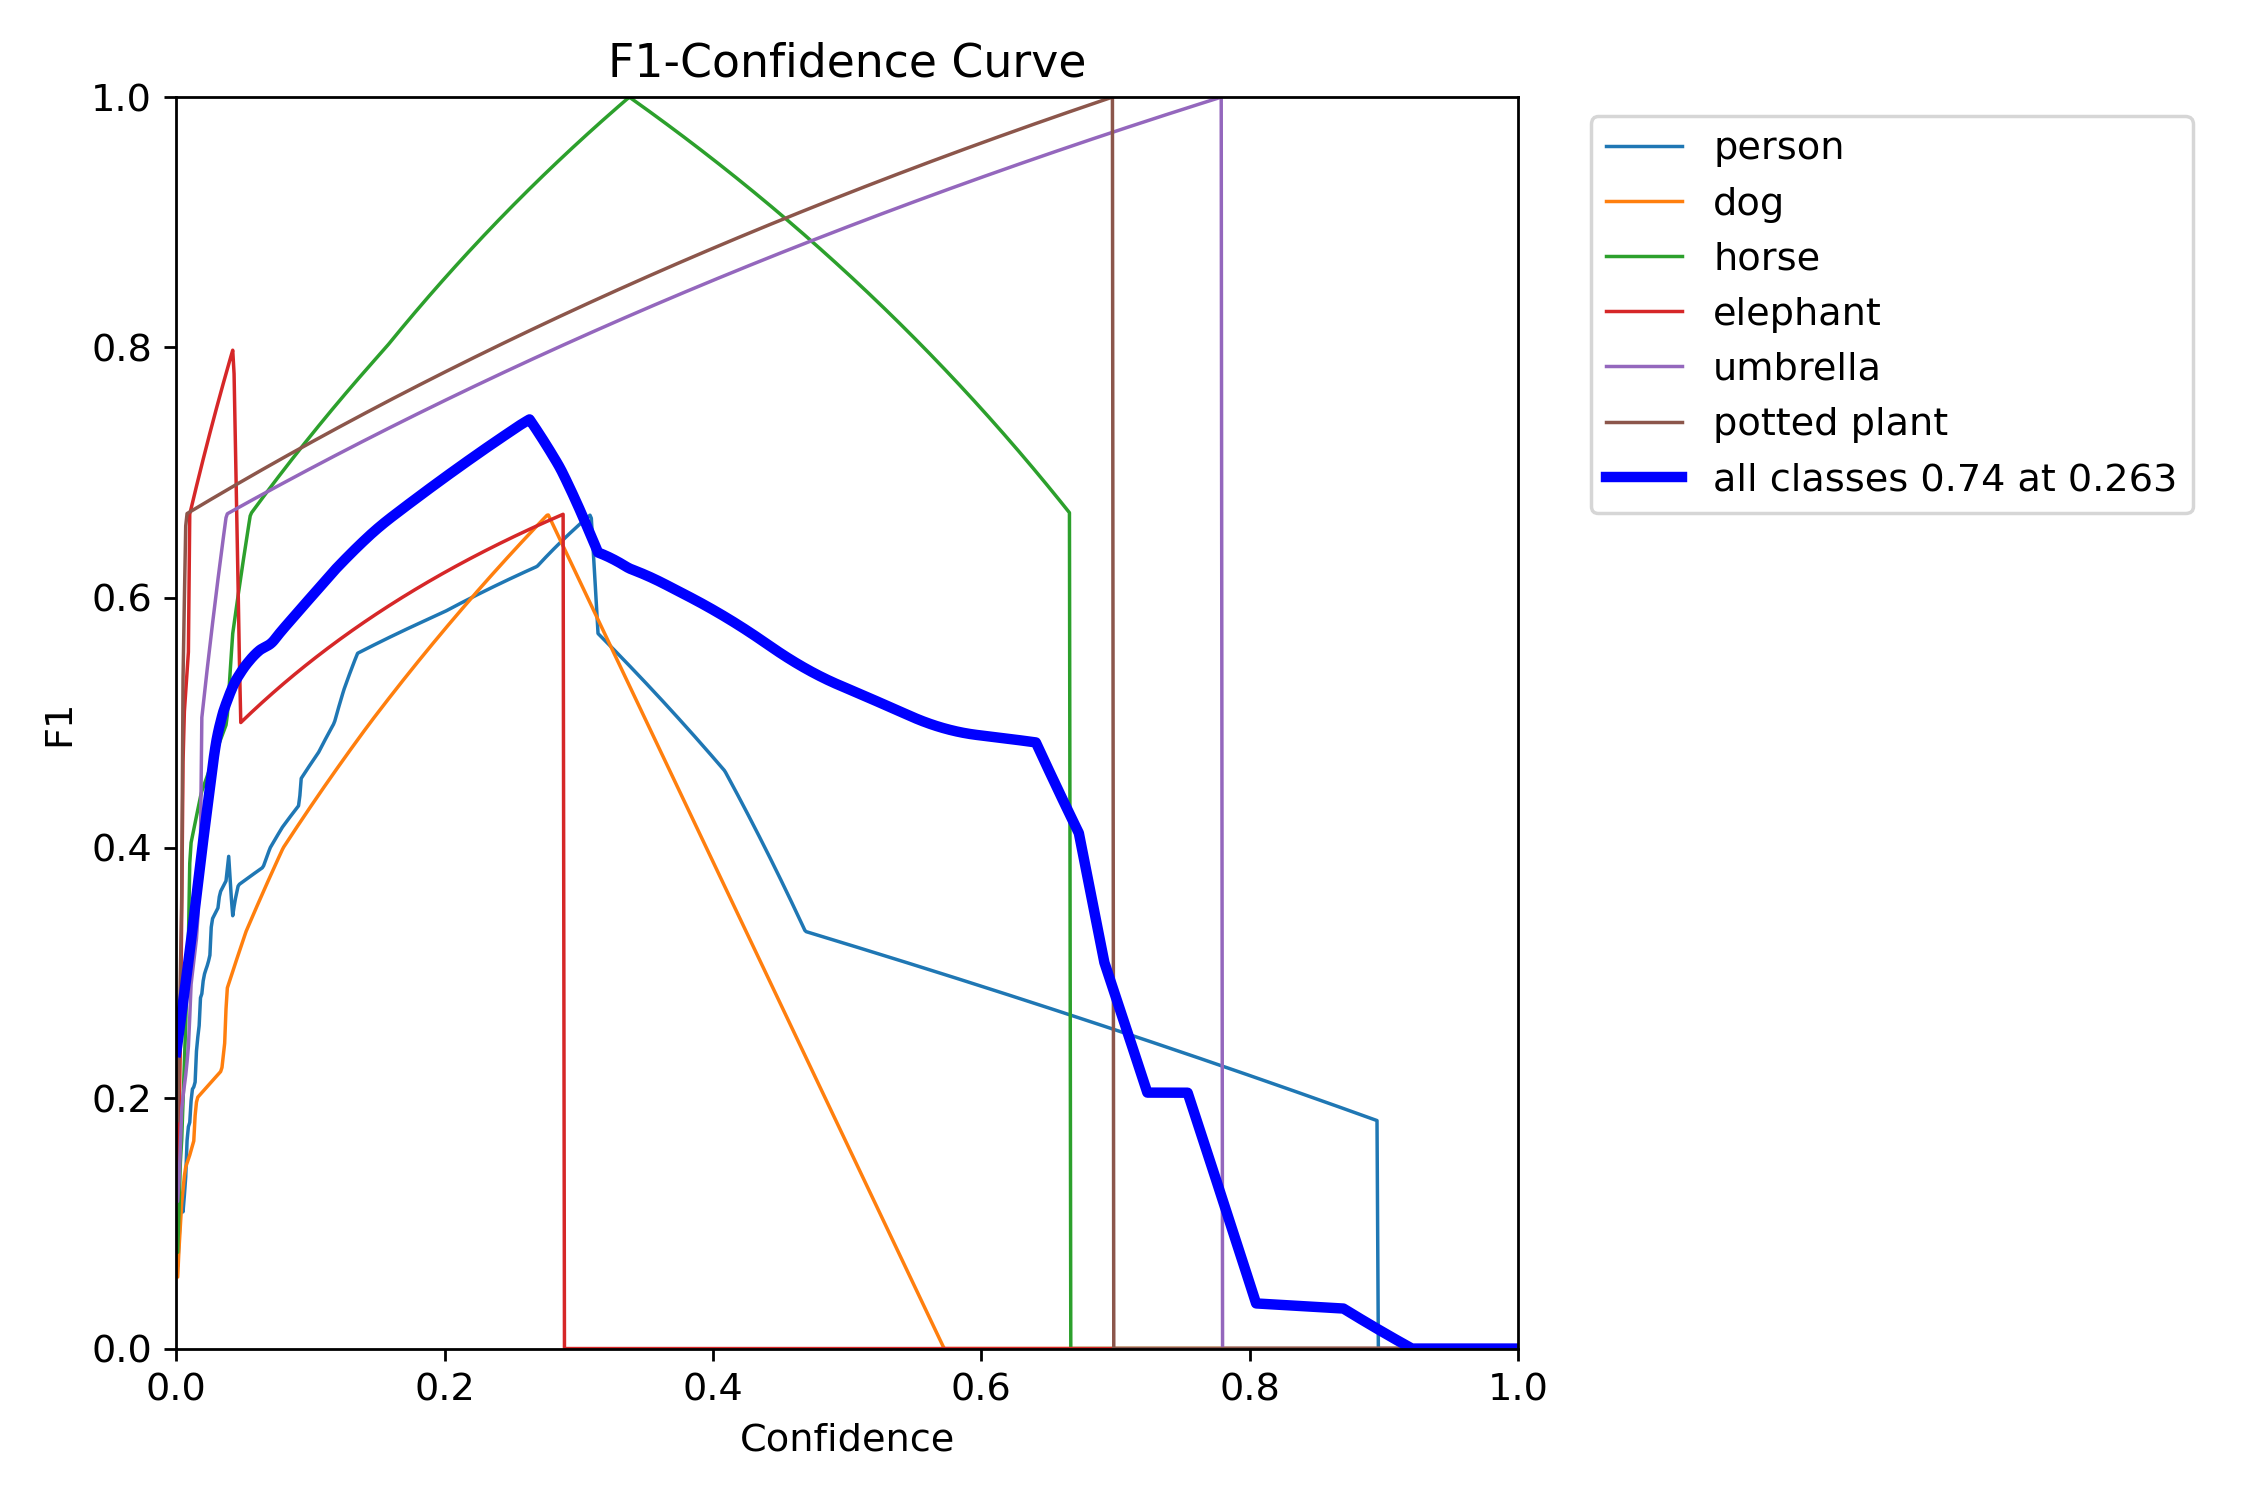

In [ ]:
Image(filename='runs/detect/val/F1_curve.png', width = 700)

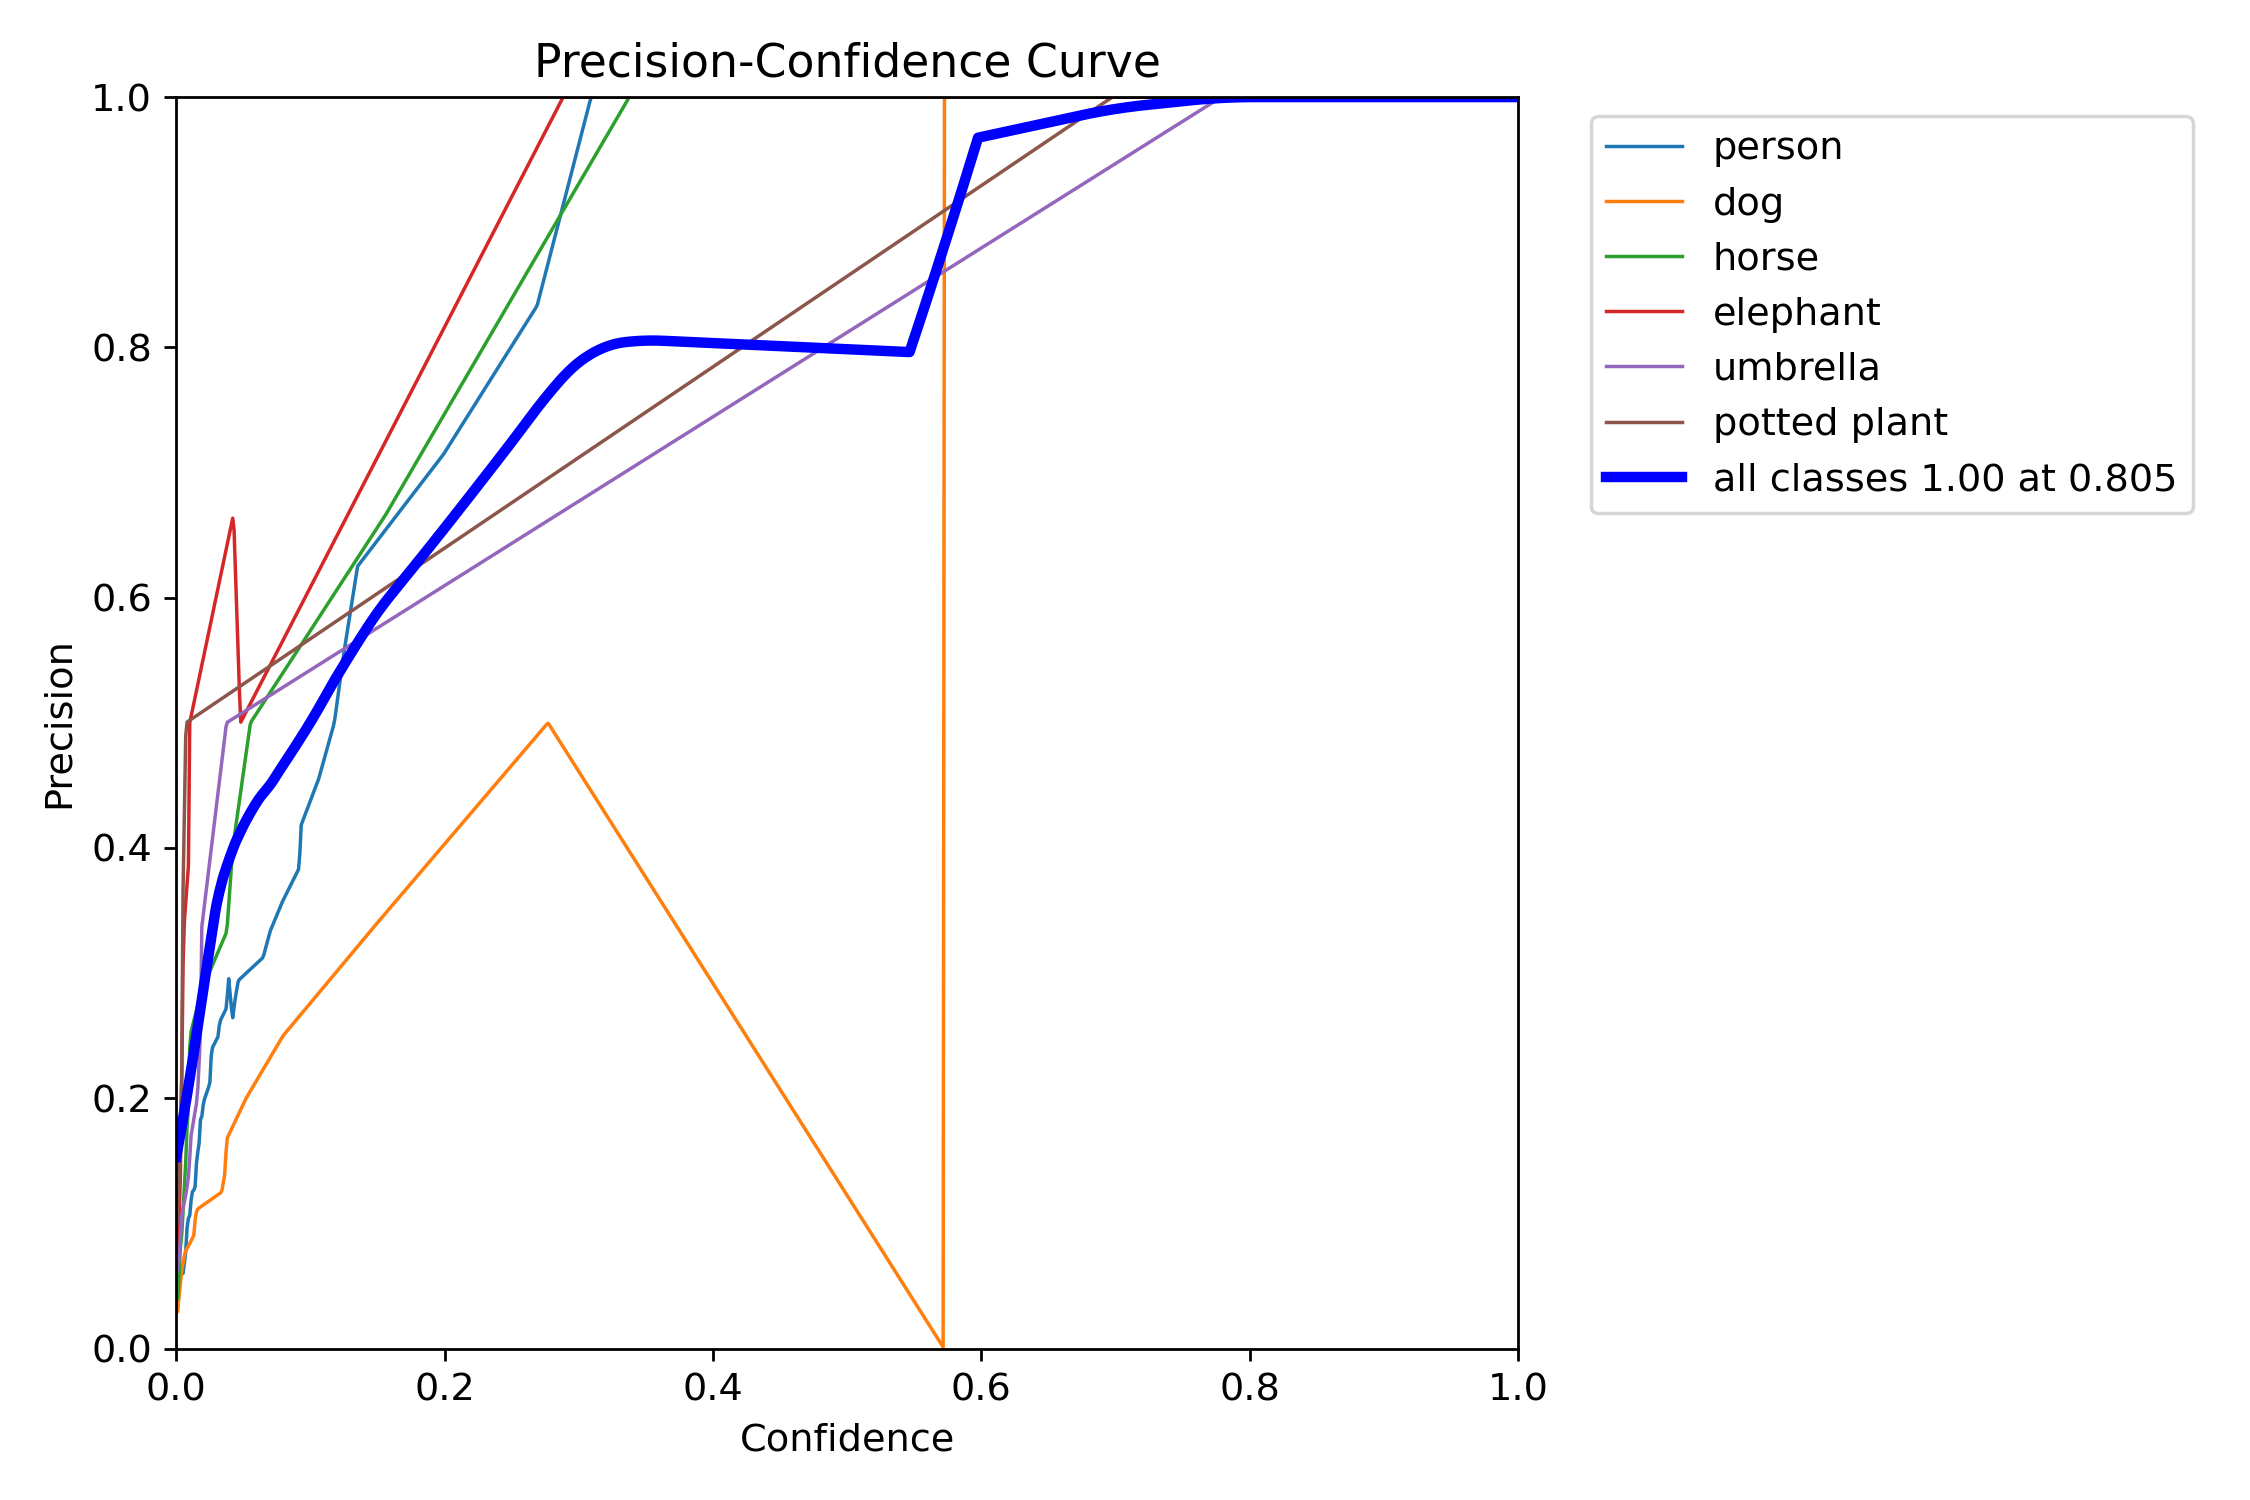

In [ ]:
Image(filename='runs/detect/val/P_curve.png', width = 700)

# 5. Python Usage

YOLOv8 was reimagined using Python-first principles for the most seamless Python YOLO experience yet. YOLOv8 models can be loaded from a trained checkpoint or created from scratch. Then methods are used to train, val, predict, and export the model. See detailed Python usage examples in the [YOLOv8 Python Docs](https://docs.ultralytics.com/usage/python/).

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from scratch
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data='coco128.yaml', epochs=3)  # train the model
results = model.val()  # evaluate model performance on the validation set
results = model('https://ultralytics.com/images/bus.jpg')  # predict on an image
results = model.export(format='onnx')  # export the model to ONNX format

## 1. Detection

YOLOv8 _detection_ models have no suffix and are the default YOLOv8 models, i.e. `yolov8n.pt` and are pretrained on COCO. See [Detection Docs](https://docs.ultralytics.com/tasks/detect/) for full details.


In [ ]:
# Load YOLOv8n, train it on COCO128 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model
model.train(data='coco128.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

100%|██████████| 6.23M/6.23M [00:00<00:00, 39.7MB/s]


Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=3, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=t

100%|██████████| 6.66M/6.66M [00:00<00:00, 75.1MB/s]
Unzipping /content/datasets/coco128.zip to /content/datasets/coco128...: 100%|██████████| 263/263 [00:00<00:00, 2104.98file/s]

Dataset download success ✅ (1.3s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 15.3MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/datasets/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 1508.35it/s]

train: New cache created: /content/datasets/coco128/labels/train2017.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.166      1.461      1.243        294        640: 100%|██████████| 8/8 [02:31<00:00, 18.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:49<00:00, 12.28s/it]

                   all        128        929      0.629      0.549      0.596      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G       1.22      1.464       1.27        251        640: 100%|██████████| 8/8 [02:10<00:00, 16.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:40<00:00, 10.25s/it]

                   all        128        929      0.613      0.578      0.614      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      1.127      1.385      1.218        158        640: 100%|██████████| 8/8 [01:57<00:00, 14.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:40<00:00, 10.15s/it]

                   all        128        929      0.625      0.587      0.632       0.47



3 epochs completed in 0.150 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:36<00:00,  9.07s/it]


                   all        128        929      0.629      0.585      0.632      0.471
                person        128        254      0.798      0.698      0.774      0.551
               bicycle        128          6      0.544      0.333      0.327      0.269
                   car        128         46      0.593      0.217      0.278      0.179
            motorcycle        128          5      0.752          1      0.962       0.78
              airplane        128          6      0.825      0.794      0.887      0.663
                   bus        128          7      0.527       0.64      0.657      0.583
                 train        128          3      0.517      0.667      0.775      0.775
                 truck        128         12      0.852      0.483      0.502      0.322
                  boat        128          6      0.362      0.291      0.396       0.27
         traffic light        128         14      0.626      0.214      0.206       0.14
             stop sig

100%|██████████| 476k/476k [00:00<00:00, 11.2MB/s]


image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 289.3ms
Speed: 5.0ms preprocess, 289.3ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 480)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

## 2. Segmentation

YOLOv8 _segmentation_ models use the `-seg` suffix, i.e. `yolov8n-seg.pt` and are pretrained on COCO. See [Segmentation Docs](https://docs.ultralytics.com/tasks/segment/) for full details.


In [ ]:
# Load YOLOv8n-seg, train it on COCO128-seg for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')  # load a pretrained YOLOv8n segmentation model
model.train(data='coco128-seg.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

## 3. Classification

YOLOv8 _classification_ models use the `-cls` suffix, i.e. `yolov8n-cls.pt` and are pretrained on ImageNet. See [Classification Docs](https://docs.ultralytics.com/tasks/classify/) for full details.


In [ ]:
# Load YOLOv8n-cls, train it on mnist160 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model
model.train(data='mnist160', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

## 4. Pose

YOLOv8 _pose_ models use the `-pose` suffix, i.e. `yolov8n-pose.pt` and are pretrained on COCO Keypoints. See [Pose Docs](https://docs.ultralytics.com/tasks/pose/) for full details.

In [ ]:
# Load YOLOv8n-pose, train it on COCO8-pose for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-pose.pt')  # load a pretrained YOLOv8n classification model
model.train(data='coco8-pose.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.predictor('https://ultralytics.com/images/bus.jpg', save_dir='results')

TypeError: ignored